# Graded Assignment 2 - Household Consumption of Electricity and Gas


# Introduction to This Template Notebook

* This is a **personal** notebook.
* Make a **copy** of `...-template.ipynb` and
**rename** it to `...-yourIDnr.ipynb`,
where `yourIDnr` is your TU/e identification number.

<div class="alert alert-danger" role="danger">
<h3>Integrity</h3>
<ul>
    <li>In this course you must act according to the rules of the TU/e code of scientific conduct.</li>
    <li>All the exercises and the graded assignments are to be executed individually and independently.</li>
    <li>You must not copy from the Internet, your friends, books... If you represent other people's work as your own, then that constitutes fraud and will be reported to the Examination Committee.</li>
    <li>Making your work available to others (complicity) also constitutes fraud.</li>
</ul>
</div>

You are expected to work with Python code in this notebook.

The locations where you should write your solutions can be recognized by
**marker lines**,
which look like this:

>`#//`
>    `BEGIN_TODO [Label]` `Description` `(n points)`
>
>`#//`
>    `END_TODO [Label]`

<div class="alert alert-warning" role="alert">Do NOT modify or delete these marker lines.  Keep them as they are.<br/>
NEVER write code <i>outside</i> the marked blocks.
Such code cannot be evaluated.
</div>

Proceed in this notebook as follows:
* **Read** the text.
* **Fill in** your solutions in the cells that are between the cells with `BEGIN_TODO` and `END_TODO` marker lines.
* **Run** _all_ code cells (also the ones _without_ your code),
    _in linear order_ from the first code cell.

# Personalize your notebook:
1. Copy the following three lines of code:

  ```python
  AUTHOR_NAME = 'Your Full Name'
  AUTHOR_ID_NR = '1234567'
  AUTHOR_DATE = 'YYYY-MM-DD'
  ```
2. Paste them between the marker lines in the next code cell.
1. Fill in your _full name_, _identification number_, and the current _date_ (i.e. when you first modified this notebook, e.g. '2024-11-15') as strings between the `Author` markers.
1. Run the code cell by putting the cursor there and typing **Control-Enter**.


In [715]:
#// BEGIN_TODO [Author] (0 points)

AUTHOR_NAME = 'Yassin Abdelkassar'
AUTHOR_ID_NR = '2127687'
AUTHOR_DATE = '2025-01-02'

In [716]:
#// END_TODO [Author]

<div class="alert alert-block alert-danger">
<b>Warning:</b>

To complete this assignment, only use the techniques covered in the programming exercises. Do not use techniques found online or through tools like ChatGPT.
</div>

# Organizational matters

Welcome to the second graded assignment of the course Foundations of Data Analytics! This assignment consists of four parts:

1. Data retrieval and preprocessing.
2. Formulating and testing a hypothesis.
3. Creating a **poster** on which you report and discuss your findings.
4. A pitch in which you try to motivate others to read your poster.

> **Note:** you are required to use the template provided on Canvas for the poster.

The deadline for the graded assignment, involving both the submission of this notebook and your poster, is **Friday January 10 at 21:00**. Then, on **Monday January 13** during the lab session, you will give your pitch.

Your assignment will be graded on three components: the work in this notebook, graded by Momotor, your poster, and the pitches. You can get up to 40 points for the part of this notebook graded by Momotor, 50 points for the poster part, including the results obtained in the part of this notebook not graded by Momotor, and 10 points for the pitch part. Additionally, you can get up to 10 bonus points for originality, creativity, or depth of your analysis.

<div class="alert alert-block alert-danger">
<b>Three very important remarks:</b>

1. Make sure that the **visualizations that you include in your poster** are also produced by your notebook. **Double-check** if the visualizations are produced correctly on Momotor under the **Running submitted notebook** tab, i.e., make sure that every visualization on your poster can also be seen under that tab.
2. Submit your notebook before the deadline and make sure **Momotor does not give any errors in any tab**.
3. **Do not write anything _outside_ marker lines `BEGIN_TODO ... END_TODO`**.
</div>

# Introduction

In GA1, you studied the impact of the weather and socioeconomic factors on gas consumption in Dutch municipalities. In this graded assignment, you will investigate and compare the consumption of gas and electricity of two individual Dutch households in the Netherlands for one year.

* First, you will retrieve the necessary data from a database, clean it, and prepare it for the analysis.
* Second, you will formulate your own problem statement related to the gas and/or electricity consumption of individual households.
* Third, you will formulate a hypothesis and an appropriate hypothesis test and perform this test for each of the two households.
* Then, after you finish the notebook:
    * On the poster, you will explain the choices you made during the assignment, present your findings, and discuss the limitations of your study.
    * In the pitch, you will tell your peers about your study in one minute with the goal to get your audience interested in your study, trying to improve your presentation skills based on the attention points you identified after the first pitch.

**Critical thinking** is one of the key skills you are expected to develop during your Bachelor studies. As this assignment is part of the CBL (challenge-based learning) line of the Bachelor program, you are not only to analyze data, but also to reflect on the limitations of your analysis coming from the choice of methods used in the data analysis, data quality, data quantity, etc. Some risks of overgeneralization become visible when comparing data from two households. Keep that in mind when conducting the analysis. You will present the most important findings related to the limitations of your study on your poster.

## Origin of the data

**Gas and electricity consumption**

You will use a data set collected by [Liander](https://www.liander.nl/over-ons/open-data), a Dutch energy grid operator. The data comes from smart meters from households that gave permission to record their gas and electricity consumption for research purposes. Some data cleaning was already performed, for example, unrealistic values were removed.

The data was collected in 2013. Gas consumption was recorded per hour and electricity consumption per 15 minutes and then aggregated per hour. For some households, the records also include the type of household, the type of house, and the age of the house. The locations of the households are unknown.

**Weather data**

You will also use weather data collected by the Royal Netherlands Meteorological Institute (KNMI) in 2013, at the Bilt weather station. This weather station is located centrally in the Netherlands and considered to be the best approximation for the weather when no location data is available.

## Personalization

This assignment is personalized. You should have received an e-mail containing a string that encodes the households.

1. Copy the following two lines of code:

  ```python
  household_1 = "Customer X"
  household_2 = "Customer Y"
  ```

2. Paste them between the marker lines in the next code cell.
3. Replace Customer X and Customer Y with the households you received in your email as strings between quotes.
4. Run the code cell.

In [1842]:
#// BEGIN_TODO [Personalization] (1 point)

household_1 = "Customer 39"
household_2 = "Customer 57"

In [1843]:
#// END_TODO [Personalization]

# Description of the dataset

The data for this assignment is stored in a database in `GA2_files/data.db`. The database contains five tables. These tables have been translated from Dutch to English where necessary.

## The `customer` table

| Column  | Type | Description |
|:-------|:----|:----|
| customer | str | A unique label identifying this customer. |
| house_type | str | The type of house, if known. Possible non-null values: Semi-detached house, Terraced house, Detached house, Apartment. |
| build_era | str | The period in which the house was built, if known. Possible non-null values: Before 1940, 1940 - 1979, 1980 - present. |
| household_type | str | The type of family that lives in the house, if known. Possible non-null values: Single, Family with children, Couple without children. |

The first few rows/columns of the customer table look like this:

<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>customer</th>
      <th>house_type</th>
      <th>build_era</th>
      <th>household_type</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Customer 2</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Customer 4</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Customer 5</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Customer 6</td>
      <td>Semi-detached house</td>
      <td>Before 1940</td>
      <td>Couple without children</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Customer 7</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
  </tbody>
</table>
</div>

## The `gas` table

This table contains gas consumption for each hour of the year in columns "Customer `n`" for each customer. The column name is thus the label Customer from the `customer` table.

|Column | Type | Unit | Description |
|:------|:-----|:-----|:------------|
| datetime | datetime | - | The local time at the end of the measurement period of one hour. |
| date | date | - | The date that this measurement period belongs to. |
| Customer `n` | float | $m^3$ | The amount of gas used in this period by this customer. |

The first few rows/columns of the gas table look like this:

<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>datetime</th>
      <th>date</th>
      <th>Customer 2</th>
      <th>Customer 4</th>
      <th>Customer 5</th>
      <th>Customer 6</th>
      <th>Customer 8</th>
      <th>Customer 10</th>
      <th>Customer 11</th>
      <th>Customer 14</th>
      <th>...</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2013-01-01 01:00:00</td>
      <td>2013-01-01</td>
      <td>0.578286</td>
      <td>0.000000</td>
      <td>0.166643</td>
      <td>0.000000</td>
      <td>0.293928</td>
      <td>0.000000</td>
      <td>0.219519</td>
      <td>0.050962</td>
      <td>...</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2013-01-01 02:00:00</td>
      <td>2013-01-01</td>
      <td>0.090742</td>
      <td>0.000000</td>
      <td>0.151401</td>
      <td>0.168662</td>
      <td>0.269638</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>...</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2013-01-01 03:00:00</td>
      <td>2013-01-01</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.149491</td>
      <td>0.000000</td>
      <td>0.040605</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.192151</td>
      <td>...</td>
    </tr>
    <tr>
      <th>3</th>
      <td>2013-01-01 04:00:00</td>
      <td>2013-01-01</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.121399</td>
      <td>0.000000</td>
      <td>0.001121</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.024404</td>
      <td>...</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2013-01-01 05:00:00</td>
      <td>2013-01-01</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.158747</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.088286</td>
      <td>...</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
  </tbody>
</table>
</div>

The `datetime` column represents the **end** time of a measuring period, but at midnight the date changes while the measurement concerns the last hour of the previous day. Therefore, the column `date` was added to simplify the programming part for you. The values correspond to the date **during** the measuring period, i.e., the hour preceding the value in `datetime`.

For example: in the table below, the row with `datetime` = `2013-06-20 00:00` concerns measurements taken between `2013-06-19 23:00` and `2013-06-20 00:00` and therefore these measurements belong to `date` = `2013-06-19`.

<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>datetime</th>
      <th>date</th>
      <th>...</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>4077</th>
      <td>2013-06-19 22:00:00</td>
      <td>2013-06-19</td>
      <td>...</td>
    </tr>
    <tr>
      <th>4078</th>
      <td>2013-06-19 23:00:00</td>
      <td>2013-06-19</td>
      <td>...</td>
    </tr>
    <tr>
      <th>4079</th>
      <td>2013-06-20 00:00:00</td>
      <td>2013-06-19</td>
      <td>...</td>
    </tr>
    <tr>
      <th>4080</th>
      <td>2013-06-20 01:00:00</td>
      <td>2013-06-20</td>
      <td>...</td>
    </tr>
    <tr>
      <th>4081</th>
      <td>2013-06-20 02:00:00</td>
      <td>2013-06-20</td>
      <td>...</td>
    </tr>
    <tr>
      <th>4082</th>
      <td>2013-06-20 03:00:00</td>
      <td>2013-06-20</td>
      <td>...</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
  </tbody>
</table>
</div>

## The `electricity` table

This table contains electricity consumption for each hour of the year in columns "Customer `n`" for each customer. The column name is thus the label Customer from the `customer` table.

|Column | Type | Unit | Description |
|:------|:-----|:-----|:------------|
| datetime | datetime | - | The local time at the end of the measurement period of one hour. |
| date | date | - | The date that this measurement period belongs to. |
| Customer `n` | float | $Wh$ | The amount of electricity used in this period by this customer. |

The column `date` was added to simplify the programming part for you. Please see the explanation with the `gas` table.

The first few rows/columns of the electricity table look like this:

<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>datetime</th>
      <th>date</th>
      <th>Customer 2</th>
      <th>Customer 4</th>
      <th>Customer 5</th>
      <th>Customer 6</th>
      <th>Customer 8</th>
      <th>Customer 10</th>
      <th>Customer 11</th>
      <th>Customer 14</th>
      <th>...</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2013-01-01 01:00:00</td>
      <td>2013-01-01</td>
      <td>791.0</td>
      <td>60.0</td>
      <td>166.0</td>
      <td>563.0</td>
      <td>744.0</td>
      <td>80.0</td>
      <td>261.0</td>
      <td>148.0</td>
      <td>...</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2013-01-01 02:00:00</td>
      <td>2013-01-01</td>
      <td>479.0</td>
      <td>59.0</td>
      <td>197.0</td>
      <td>382.0</td>
      <td>688.0</td>
      <td>107.0</td>
      <td>114.0</td>
      <td>180.0</td>
      <td>...</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2013-01-01 03:00:00</td>
      <td>2013-01-01</td>
      <td>286.0</td>
      <td>79.0</td>
      <td>131.0</td>
      <td>112.0</td>
      <td>486.0</td>
      <td>59.0</td>
      <td>104.0</td>
      <td>154.0</td>
      <td>...</td>
    </tr>
    <tr>
      <th>3</th>
      <td>2013-01-01 04:00:00</td>
      <td>2013-01-01</td>
      <td>199.0</td>
      <td>125.0</td>
      <td>192.0</td>
      <td>96.0</td>
      <td>353.0</td>
      <td>102.0</td>
      <td>123.0</td>
      <td>147.0</td>
      <td>...</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2013-01-01 05:00:00</td>
      <td>2013-01-01</td>
      <td>112.0</td>
      <td>84.0</td>
      <td>153.0</td>
      <td>110.0</td>
      <td>348.0</td>
      <td>67.0</td>
      <td>112.0</td>
      <td>174.0</td>
      <td>...</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
  </tbody>
</table>
</div>

## The `weather` table

| Column | Type | Unit | Description |
|:-------|------|------|--------------|
| datetime | datetime | - | The local time at the end of the measurement period of one hour. |
| date | date | - | The date that this measurement period belongs to. |
| temperature | float | $°C$ | Average temperature during the measuring period, at an altitude of 1.50 m. |
| wind_speed | float | $m/s$ | Average wind speed during the measuring period. |

The column `date` was added to simplify the programming part for you. Please see the explanation with the `gas` table.

The first few rows/columns of the weather table look like this:

<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>datetime</th>
      <th>date</th>
      <th>temperature</th>
      <th>wind_speed</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2013-01-01 01:00:00</td>
      <td>2013-01-01</td>
      <td>8.6</td>
      <td>8.0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2013-01-01 02:00:00</td>
      <td>2013-01-01</td>
      <td>8.5</td>
      <td>6.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2013-01-01 03:00:00</td>
      <td>2013-01-01</td>
      <td>8.6</td>
      <td>5.0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>2013-01-01 04:00:00</td>
      <td>2013-01-01</td>
      <td>8.6</td>
      <td>6.0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2013-01-01 05:00:00</td>
      <td>2013-01-01</td>
      <td>8.6</td>
      <td>4.0</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
  </tbody>
</table>
</div>

## The `weather_extra` table

| Column | Type | Unit | Description |
|:-------|------|------|--------------|
| datetime | datetime | - | The local time at the end of the measurement period of one hour. |
| date | date | - | The date that this measurement period belongs to. |
| wind_direction | int | $°$ | Mean wind direction (in degrees) during the measuring period (360=north, 90=east, 180=south, 270=west, 0=calm, 990=unstable). |
| wind_gust | float | $m/s$ | Maximum wind gust during the measuring period. |
| sunshine_duration | float | $hours$ | Sunshine duration during the measuring period, calculated from global radiation (-1 for <0.05 hour). |
| global_radiation | float | $J/cm^2$ | Global radiation during the measuring period. |
| precipitation | float | $mm$ | Total precipitation amount during the measuring period (-1 for <0.05 mm). |
| air_pressure | float | $hPa$ | Air pressure reduced to mean sea level, at the time of observation. |
| cloud_cover | float | $octants$ | Cloud cover (in octants), at the time of observation (0=sky completely clear, ..., 4=sky half cloudy, ..., 8=sky completely cloudy, 9=sky invisible). |
| humidity | float | $\%$ | Relative atmospheric humidity at 1.50 m above the ground at the time of observation. |
| fog | int | - | Fog (0=no occurrence, 1=occurred during the preceding hour and/or at the time of observation). |
| rainfall | int | - | Rainfall (0=no occurrence, 1=occurred during the preceding hour and/or at the time of observation). |
| snow | int | - | Snow (0=no occurrence, 1=occurred during the preceding hour and/or at the time of observation). |
| thunder | int | - | Thunder (0=no occurrence, 1=occurred during the preceding hour and/or at the time of observation). |
| ice_formation | int | - | Ice formation (0=no occurrence, 1=occurred during the preceding hour and/or at the time of observation). |

The column `date` was added to simplify the programming part for you. Please see the explanation with the `gas` table.

The first few rows/columns of the weather_extra table look like this:

<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>datetime</th>
      <th>date</th>
      <th>wind_direction</th>
      <th>wind_gust</th>
      <th>sunshine_duration</th>
      <th>global_radiation</th>
      <th>precipitation</th>
      <th>air_pressure</th>
      <th>cloud_cover</th>
      <th>humidity</th>
      <th>fog</th>
      <th>rainfall</th>
      <th>snow</th>
      <th>thunder</th>
      <th>ice_formation</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2013-01-01 01:00:00</td>
      <td>2013-01-01</td>
      <td>210</td>
      <td>12.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.6</td>
      <td>999.3</td>
      <td>8.0</td>
      <td>93.0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2013-01-01 02:00:00</td>
      <td>2013-01-01</td>
      <td>220</td>
      <td>12.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.8</td>
      <td>999.0</td>
      <td>8.0</td>
      <td>95.0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2013-01-01 03:00:00</td>
      <td>2013-01-01</td>
      <td>230</td>
      <td>11.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.3</td>
      <td>998.9</td>
      <td>8.0</td>
      <td>95.0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>2013-01-01 04:00:00</td>
      <td>2013-01-01</td>
      <td>230</td>
      <td>9.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.4</td>
      <td>998.9</td>
      <td>8.0</td>
      <td>95.0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2013-01-01 05:00:00</td>
      <td>2013-01-01</td>
      <td>220</td>
      <td>8.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.1</td>
      <td>998.8</td>
      <td>8.0</td>
      <td>96.0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
  </tbody>
</table>
</div>

# Preparation

## Loading the libraries

In [1844]:
import numpy as np
import pandas as pd
import sqlite3

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, confusion_matrix
from sklearn.model_selection import train_test_split

from scipy.ndimage import gaussian_filter1d

import matplotlib.pyplot as plt
import seaborn as sns  # also improves the look of plots
sns.set_theme()
plt.rcParams['figure.figsize'] = 16, 9  # default hor./vert. size of plots, in inches

## Loading the data

1. Connect to the SQLite database in the `'GA2_files/data.db'` file. Use a **single SQL query** to retrieve from the `customer` table a dataframe with the households assigned to you. Store the query in the variable `query_customer`. Store the dataframe in the variable `df_customer`. Make sure the table is indexed by the customer column. Check the contents of `df_customer` to see if there is any additional information about either of the two households.

   **Hint:** pass for instance the keyword argument `index_col='customer'` to the `read_sql_query` function.

In [1845]:
#// BEGIN_TODO [Extract-customers] (2 points)
conn_data = sqlite3.connect('GA2_files/data.db')
query_customer = ''' 
    SELECT customer, house_type, build_era, household_type
    FROM customer
    WHERE customer = 'Customer 39' OR customer = 'Customer 57'
'''
df_customer = pd.read_sql_query(query_customer, conn_data, index_col='customer')

In [1846]:
df_customer

,house_type,build_era,household_type
customer,,,
Customer 39,Terraced house,1980 - present,Single
Customer 57,None,None,None


In [1847]:
#// END_TODO [Extract-customers]

2. Use a **single SQL query** to retrieve `gas`, `electricity`, and `weather` data from the corresponding tables. Create a dataframe for `household_1` containing columns `date`, `gas`, `electricity`, `temperature`, and `wind_speed` with a row for every hour in 2013. For the index, use the `datetime`. Store the query in the variable `query_household_1`. Store the dataframe in the variable `df_household_1`. Make sure the table is indexed by the datetime column. Also make sure that both `datetime` and `date` are parsed correctly.

   **Hint:** pass for instance the keyword argument `parse_dates=['datetime', 'date']` to the `read_sql_query` function.

> It is important to note that the `datetime` column represents the **end** time of a measuring period while the `date` column represents the date **during** the measuring period. For example: the row with `datetime` = `2013-06-19 00:00` concerns measurements taken between `2013-06-18 23:00` and `2013-06-19 00:00` and therefore these measurements belong to `date` = `2013-06-18`.

Your output should look similar to the following:

<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>date</th>
      <th>gas</th>
      <th>electricity</th>
      <th>temperature</th>
      <th>wind_speed</th>
    </tr>
    <tr>
      <th>datetime</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2013-01-01 01:00:00</th>
      <td>2013-01-01</td>
      <td>0.000000</td>
      <td>563.0</td>
      <td>8.6</td>
      <td>8.0</td>
    </tr>
    <tr>
      <th>2013-01-01 02:00:00</th>
      <td>2013-01-01</td>
      <td>0.168662</td>
      <td>382.0</td>
      <td>8.5</td>
      <td>6.0</td>
    </tr>
    <tr>
      <th>2013-01-01 03:00:00</th>
      <td>2013-01-01</td>
      <td>0.000000</td>
      <td>112.0</td>
      <td>8.6</td>
      <td>5.0</td>
    </tr>
    <tr>
      <th>2013-01-01 04:00:00</th>
      <td>2013-01-01</td>
      <td>0.000000</td>
      <td>96.0</td>
      <td>8.6</td>
      <td>6.0</td>
    </tr>
    <tr>
      <th>2013-01-01 05:00:00</th>
      <td>2013-01-01</td>
      <td>0.000000</td>
      <td>110.0</td>
      <td>8.6</td>
      <td>4.0</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>2013-12-31 20:00:00</th>
      <td>2013-12-31</td>
      <td>0.000000</td>
      <td>843.0</td>
      <td>6.6</td>
      <td>6.0</td>
    </tr>
    <tr>
      <th>2013-12-31 21:00:00</th>
      <td>2013-12-31</td>
      <td>0.037085</td>
      <td>860.0</td>
      <td>6.1</td>
      <td>4.0</td>
    </tr>
    <tr>
      <th>2013-12-31 22:00:00</th>
      <td>2013-12-31</td>
      <td>0.000000</td>
      <td>682.0</td>
      <td>5.9</td>
      <td>5.0</td>
    </tr>
    <tr>
      <th>2013-12-31 23:00:00</th>
      <td>2013-12-31</td>
      <td>0.000000</td>
      <td>747.0</td>
      <td>5.9</td>
      <td>5.0</td>
    </tr>
    <tr>
      <th>2014-01-01 00:00:00</th>
      <td>2013-12-31</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>6.0</td>
      <td>5.0</td>
    </tr>
  </tbody>
</table>
<p>8760 rows × 5 columns</p>
</div>

In [1848]:
#// BEGIN_TODO [Extract-household-1] (5 points)

query_household_1 = '''
    SELECT gas.datetime, gas.date, gas.'Customer 39' AS gas, electricity.'Customer 39' AS electricity, weather.temperature, weather.wind_speed
    FROM customer, gas, electricity, weather
    WHERE gas.datetime = electricity.datetime AND gas.datetime = weather.datetime AND customer.customer = 'Customer 39'
'''


In [1849]:
    # WHERE gas.datetime = electricity.datetime AND gas.datetime = weather.datetime AND customer.customer = 'Customer 39'


In [1850]:
# query_household_1 = '''
#     SELECT gas.datetime, gas.date, gas."customer 39" AS gas, electricity."Customer 39" AS electricity, weather.temperature, weather.wind_speed
#     FROM gas
#     JOIN electricity ON gas.datetime = electricity.datetime
#     JOIN customer ON customer.customer = 'Customer 39'
#     JOIN weather ON gas.datetime = weather.datetime
 
# '''

In [1851]:
df_household_1 = pd.read_sql_query(query_household_1, conn_data, index_col='datetime', parse_dates=['datetime', 'date'])

In [1852]:
#  AND gas.datetime = weather.datetime

In [1853]:
df_household_1

,date,gas,electricity,temperature,wind_speed
datetime,,,,,
2013-01-01 01:00:00,2013-01-01,0.000000,649.0,8.6,8.0
2013-01-01 02:00:00,2013-01-01,0.014178,948.0,8.5,6.0
2013-01-01 03:00:00,2013-01-01,0.000000,113.0,8.6,5.0
2013-01-01 04:00:00,2013-01-01,0.014319,100.0,8.6,6.0
2013-01-01 05:00:00,2013-01-01,0.012681,120.0,8.6,4.0
...,...,...,...,...,...
2013-12-31 20:00:00,2013-12-31,0.000000,449.0,6.6,6.0
2013-12-31 21:00:00,2013-12-31,0.011963,280.0,6.1,4.0
2013-12-31 22:00:00,2013-12-31,0.015042,277.0,5.9,5.0


In [1854]:
#// END_TODO [Extract-household-1]

3. Create a dataframe for `household_2` in the same way as for `household_1`. Store the query in the variable `query_household_2`. Store the dataframe in the variable `df_household_2`. Make sure the dataframe has the same format as `df_household_1`.

In [1855]:
#// BEGIN_TODO [Extract-household-2] (2 points)

query_household_2 = '''
    SELECT gas.datetime, gas.date, gas.'Customer 57' AS gas, electricity.'Customer 57' AS electricity, weather.temperature, weather.wind_speed
    FROM customer, gas, electricity, weather
    WHERE gas.datetime = electricity.datetime AND gas.datetime = weather.datetime AND customer.customer = 'Customer 57'
'''
df_household_2 = pd.read_sql_query(query_household_2, conn_data, index_col='datetime', parse_dates=['datetime', 'date'])


In [1856]:
df_household_2

,date,gas,electricity,temperature,wind_speed
datetime,,,,,
2013-01-01 01:00:00,2013-01-01,0.000000,329.0,8.6,8.0
2013-01-01 02:00:00,2013-01-01,0.017137,90.0,8.5,6.0
2013-01-01 03:00:00,2013-01-01,0.000000,111.0,8.6,5.0
2013-01-01 04:00:00,2013-01-01,0.016311,94.0,8.6,6.0
2013-01-01 05:00:00,2013-01-01,0.000000,99.0,8.6,4.0
...,...,...,...,...,...
2013-12-31 20:00:00,2013-12-31,0.125508,435.0,6.6,6.0
2013-12-31 21:00:00,2013-12-31,0.486889,395.0,6.1,4.0
2013-12-31 22:00:00,2013-12-31,0.187895,382.0,5.9,5.0


In [1857]:
#// END_TODO [Extract-household-2]

# Data quality

Earlier in this assignment, it was stated that the data was partially cleaned (e.g., the datetime columns in the different tables were converted to the same format, the data and metadata (column names) were translated to English, and unrealistic measurements were removed). But,
* How complete is the data?
* How much data is missing and on which days is it missing?

1. For each of the two households, add a column `missing` to the dataframe holding Boolean values to signal if there is at least one missing value in that row (`True`) or not, i.e., all values of the row are present (`False`). Then determine what percentage of data is missing or incomplete for each household (i.e., the percentage of rows with a NaN value). Store your answer in variables `household_1_missing_percent` and `household_2_missing_percent`.

   **Hint:** Check the [Hints](https://canvas.tue.nl/courses/28674/pages/hints) page on Canvas if you get stuck!

In [1858]:
#// BEGIN_TODO [Missing-data] (4 points)
df_household_1['missing'] = df_household_1.isnull().any(axis=1)
household_1_missing_percent = df_household_1['missing'].sum() / len(df_household_1) * 100

# #df_household_1['missing'] = df_household_1.isnull()
# df_household_1.isnull()
# #household_1['missing'] = df_household_1.isnull().sum()
# something = df_household_1.isnull()
# a=something.groupby(something.columns, axis=1)
# a.describe()
household_1_missing_percent

0.03424657534246575

In [1859]:
df_household_2['missing'] = df_household_2.isnull().any(axis=1)
household_2_missing_percent = df_household_2['missing'].sum() / len(df_household_2) * 100


In [1860]:
household_2_missing_percent

0.03424657534246575

In [1861]:
#// END_TODO [Missing-data]

2. Even if there is enough data to work with, having several missing values on the same day may still be problematic. Check if the missing values are concentrated on particular days.

    For each day, calculate the percentage of rows with missing values. Store your results as Series in variables `s_missing_household_1` and `s_missing_household_2` with `date` as index.

In [1862]:
#// BEGIN_TODO [Missing-daily] (4 points)

rows_per_day_1 = df_household_1.groupby('date').size()
s_missing_household_1 = (df_household_1.groupby('date')['missing'].mean()) *100
# s_missing_household_1 = missing_per_day / rows_per_day * 100
# s_missing_household_1


In [1863]:
s_missing_household_1

date
2013-01-01    0.000000
2013-01-02    0.000000
2013-01-03    0.000000
2013-01-04    0.000000
2013-01-05    0.000000
                ...   
2013-12-27    0.000000
2013-12-28    0.000000
2013-12-29    0.000000
2013-12-30    0.000000
2013-12-31    4.166667
Name: missing, Length: 365, dtype: float64

In [1864]:
rows_per_day_2 = df_household_2.groupby('date').size()
s_missing_household_2 = (df_household_2.groupby('date')['missing'].mean()) * 100
# s_missing_household_2 = missing_per_day / rows_per_day * 100
# s_missing_household_2

In [1865]:
s_missing_household_2

date
2013-01-01    0.000000
2013-01-02    0.000000
2013-01-03    0.000000
2013-01-04    0.000000
2013-01-05    0.000000
                ...   
2013-12-27    0.000000
2013-12-28    0.000000
2013-12-29    0.000000
2013-12-30    0.000000
2013-12-31    4.166667
Name: missing, Length: 365, dtype: float64

In [1866]:
#// END_TODO [Missing-daily]

3. Look at your results from the previous step.
    * Are the missing data clustered or scattered?
    * Are there significant differences between the two households?
    * Do you think this could potentially affect future analysis choices (and if so, how)?
    * Can it have influence on the results of the data analysis (and if so, how)?

   Reflect on the points above and store your observations as a string in the variable `observations_missing_data`.

In [1867]:
#// BEGIN_TODO [Observations-missing-data] (2 points)

observations_missing_data = "Both household_1 and household_2 have missing data. The percentage of missing data in both households is the same (0,034%). The missing data is relatively scattered in different days. There is no difference between the two households. I think this would not affect the future results analysis because the missing data is very low and is equal for both house_holds. It could affect the choices of analysis methods, because some methods are more sensitive to missing data than others. Thus, I think that these rows could be removed as they do not represent much of the data."

In [1868]:
#// END_TODO [Observations-missing-data]

# Taking a first look at the data

Before writing a hypothesis, it is good to see what the data looks like. Therefore, in this section, you will create several figures to learn more about the data. Ask yourself what is interesting about each plot and try to come up with plausible explanations.

1. Use `df_household_1` and `df_household_2` to plot the hourly gas and electricity consumption of `household_1` and `household_2`. Create a figure with four line plots -- two showing hourly gas consumption and two showing electricity consumption side-by-side for each household for the entire year. What can you learn from this figure? Write your observations as a string in the variable `observations_figure_1`.

> **Note:** Do not forget to follow the best practices for visualizations.
  **This applies to all coming tasks requiring visualizations.**
  You must:
> - Include a descriptive **title**.
> - Add **labels** to the **axes** and include the **units** of the quantities on the axes if applicable.
> - Ensure that the plot is **readable** and **understandable** (also for somebody who is color-blind).
> - Choose appropriate **ranges** for the plot **axes**.
> - Include a **legend** when appropriate.

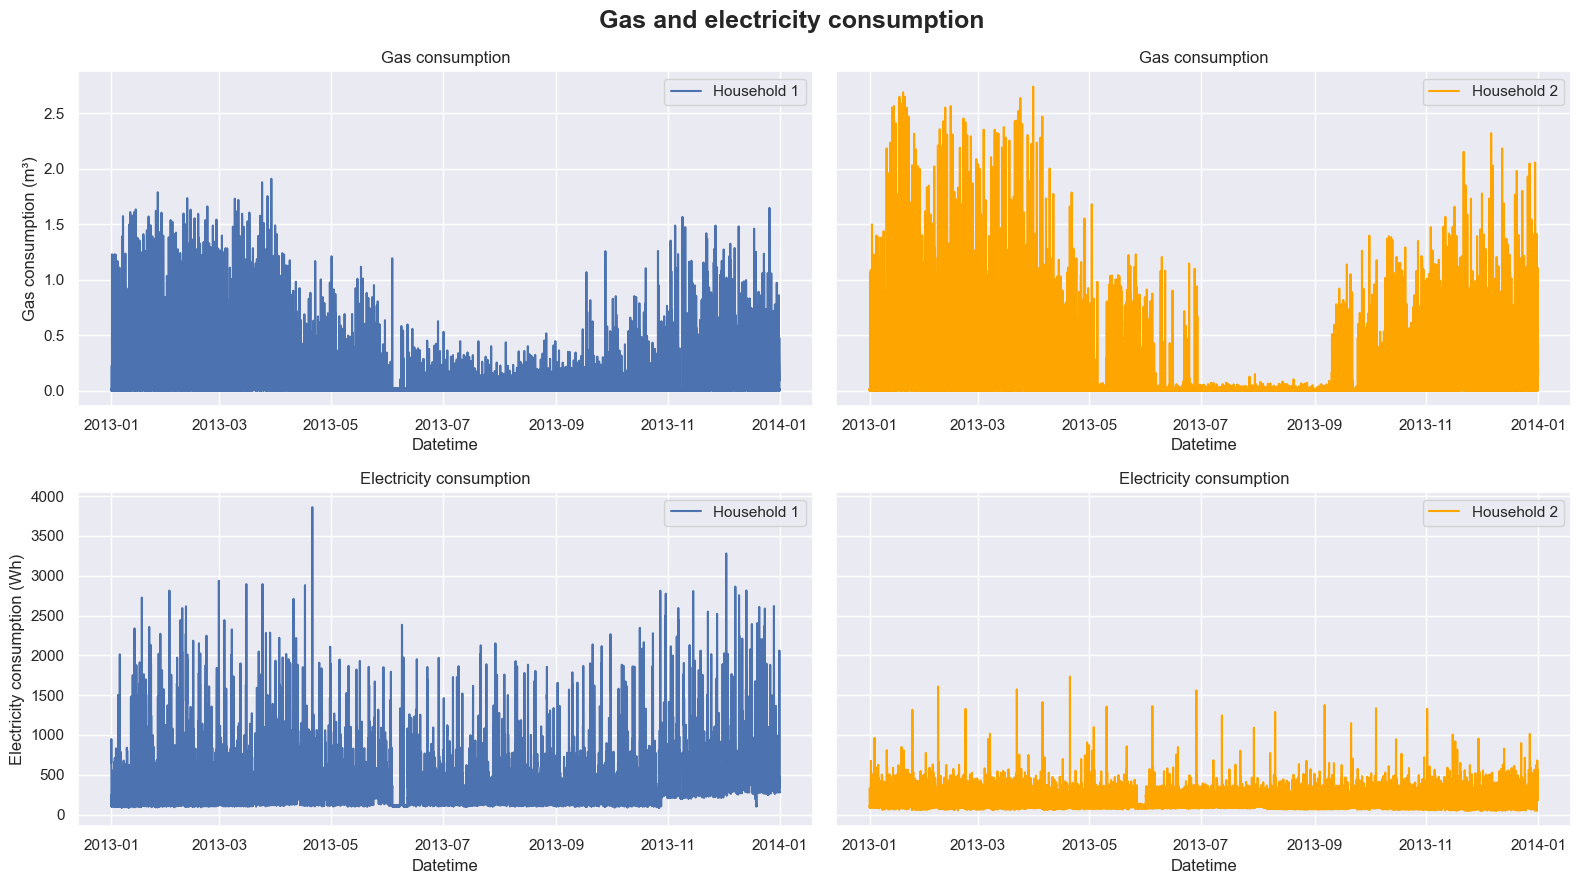

In [1869]:
#// BEGIN_TODO [First-look] (3 points)

fig, ax = plt.subplots(ncols=2, nrows=2, sharey='row')

#df_household_1['gas'].plot(x='datetime', ax=ax[0,0], title='Gas consumption')
sns.lineplot(data=df_household_1, x='datetime', y='gas', ax=ax[0,0], label='Household 1')
sns.lineplot(data=df_household_2, x='datetime', y='gas', ax=ax[0,1], label='Household 2', color='orange')

sns.lineplot(data=df_household_1, x='datetime', y='electricity', ax=ax[1,0], label='Household 1')
sns.lineplot(data=df_household_2, x='datetime', y='electricity', ax=ax[1,1], label='Household 2', color='orange')

#sns.lineplot(data=df_household_2['gas'], ax=ax[0])

plt.suptitle('Gas and electricity consumption', weight='bold', size=18)
ax[0,0].set_title('Gas consumption')
ax[0,1].set_title('Gas consumption')	
ax[0,0].set_ylabel('Gas consumption (m³)')
ax[1,0].set_title('Electricity consumption')
ax[1,1].set_title('Electricity consumption')

ax[1,0].set_ylabel('Electricity consumption (Wh)')
ax[1,0].set_xlabel('Datetime')
ax[1,1].set_xlabel('Datetime')
ax[0,0].set_xlabel('Datetime')
ax[0,1].set_xlabel('Datetime')


plt.tight_layout();
sns.set_palette('colorblind')


In [1871]:
observations_figure_1 = "The plots show the hourly gas and electricity consumption for both households over the entire year. Household 1 has more consistent gas consumption throughout the year(although the seasonal consumption is visible), while Household 2 shows more variability. Also it seems that in the colder months, Household 2 uses more gas than Household 1. Both households have higher gas consumption during the colder months. Electricity consumption for both households shows daily patterns, with peaks in the morning and evening. Household 1 has higher electricity consumption overall compared to Household 2. But the electricity usage for Household 1 drops in the summer."

In [1872]:
#// END_TODO [First-look]

2. Create two more figures of your choosing, based on your observations and questions they led to. Perhaps you want to zoom in on a particular period, look at other columns of the dataframes, apply some filter, or try different kinds of plots. Write your observations for the two new figures as strings in the variables `observations_figure_2` and `observations_figure_3` respectively.

In [1873]:
#// BEGIN_TODO [More-figures] (3 points)

In [1874]:
df_household_1_filtered = df_household_1.copy()
df_household_2_filtered = df_household_2.copy()

In [1875]:
# df_household_1_filtered = df_household_1_filtered.dropna(how='any')
# df_household_2_filtered = df_household_2_filtered.dropna(how='any')

In [1876]:
df_household_1_filtered['gas_filtered'] = gaussian_filter1d(df_household_1_filtered['gas'], sigma=96, mode='nearest', order=1)
df_household_2_filtered['gas_filtered'] = gaussian_filter1d(df_household_2_filtered['gas'], sigma=96, mode='nearest', order=1)
df_household_1_filtered['electricity_filtered'] = gaussian_filter1d(df_household_1_filtered['electricity'], sigma=96, mode='nearest', order=1)
df_household_2_filtered['electricity_filtered'] = gaussian_filter1d(df_household_2_filtered['electricity'], sigma=96, mode='nearest', order=1)

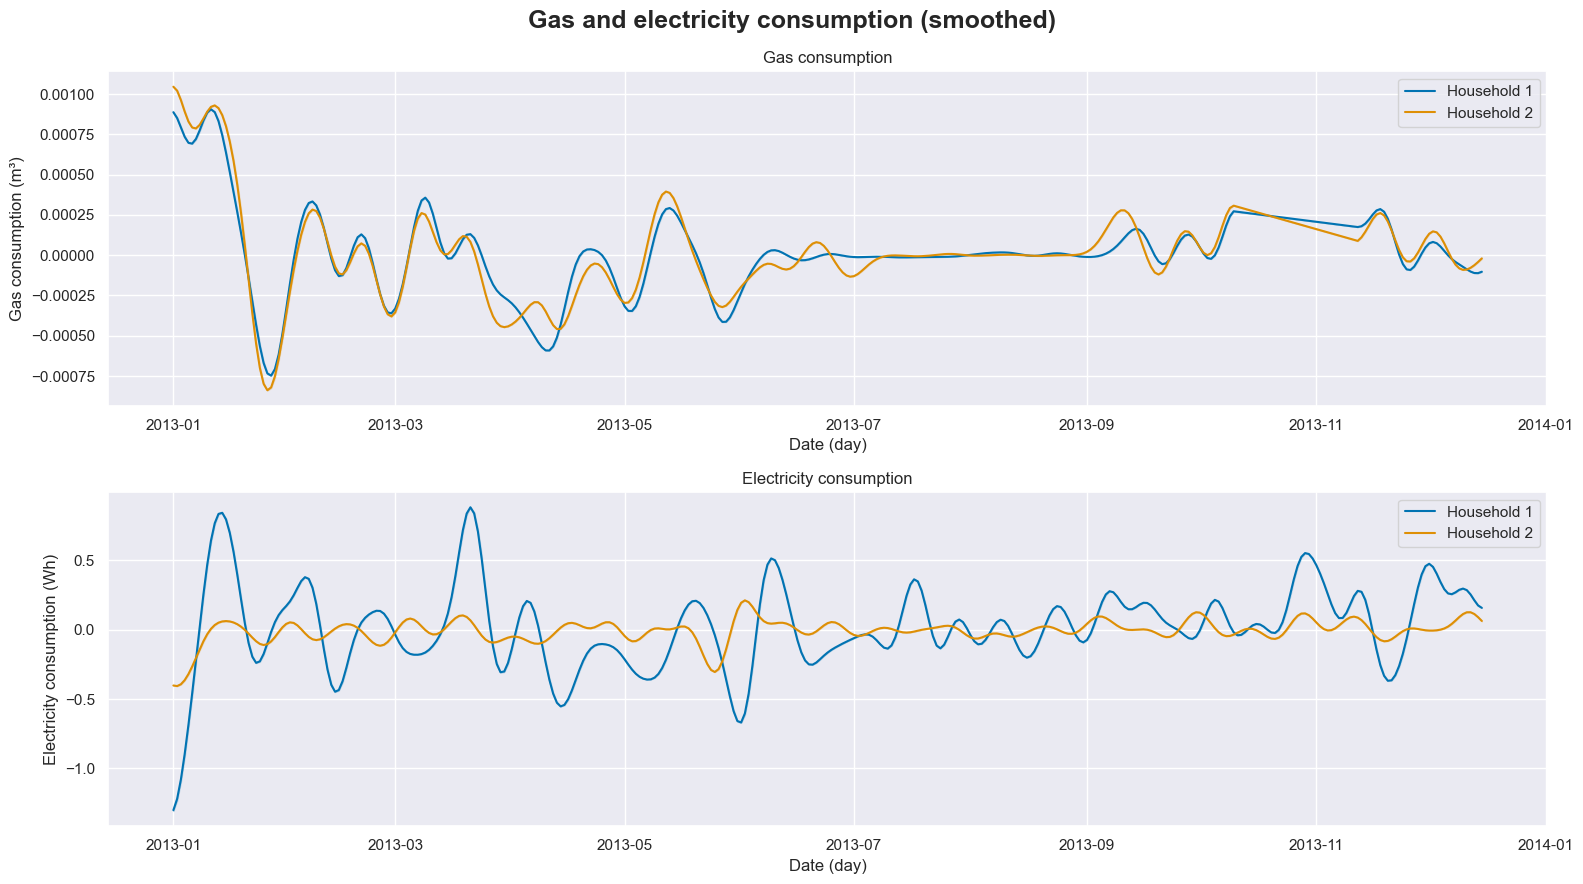

In [1877]:
fig, ax = plt.subplots(ncols=1, nrows=2, sharey='row')

sns.lineplot(data=df_household_1_filtered, x='date', y='gas_filtered', ax=ax[0], label='Household 1')
sns.lineplot(data=df_household_2_filtered, x='date', y='gas_filtered', ax=ax[0], label='Household 2')

sns.lineplot(data=df_household_1_filtered, x='date', y='electricity_filtered', ax=ax[1], label='Household 1')
sns.lineplot(data=df_household_2_filtered, x='date', y='electricity_filtered', ax=ax[1], label='Household 2')

plt.suptitle('Gas and electricity consumption (smoothed)', weight='bold', size=18)
ax[0].set_title('Gas consumption')
ax[1].set_title('Electricity consumption')
ax[0].set_ylabel('Gas consumption (m³)')
ax[1].set_ylabel('Electricity consumption (Wh)')
ax[0].set_xlabel('Date (day)')
ax[1].set_xlabel('Date (day)')
plt.tight_layout();


In [1879]:
observations_figure_2 = "This figure has been created after applying a Gaussian filter to the energy consumption with a sigma of 96 hours. The plot showing the electricity consumptions shows that the fluctuatsin in electricity consumption is more visible in Household 1 than in Household 2. The gas consumption plot shows that the gas consumption of both households is relatively similar. In the summer, the usage is lower for both households. But the electricity usage does not show a considerable change in the summer months."

In [1880]:
df_household_1_filtered['gas_filtered_deriv'] = gaussian_filter1d(df_household_1_filtered['gas'], sigma=24, mode='nearest', order=1)	
df_household_2_filtered['gas_filtered_deriv'] = gaussian_filter1d(df_household_2_filtered['gas'], sigma=24, mode='nearest', order=1)
df_household_1_filtered['electricity_filtered_deriv'] = gaussian_filter1d(df_household_1_filtered['electricity'], sigma=50, mode='nearest', order=1)
df_household_2_filtered['electricity_filtered_deriv'] = gaussian_filter1d(df_household_2_filtered['electricity'], sigma=50, mode='nearest', order=1)

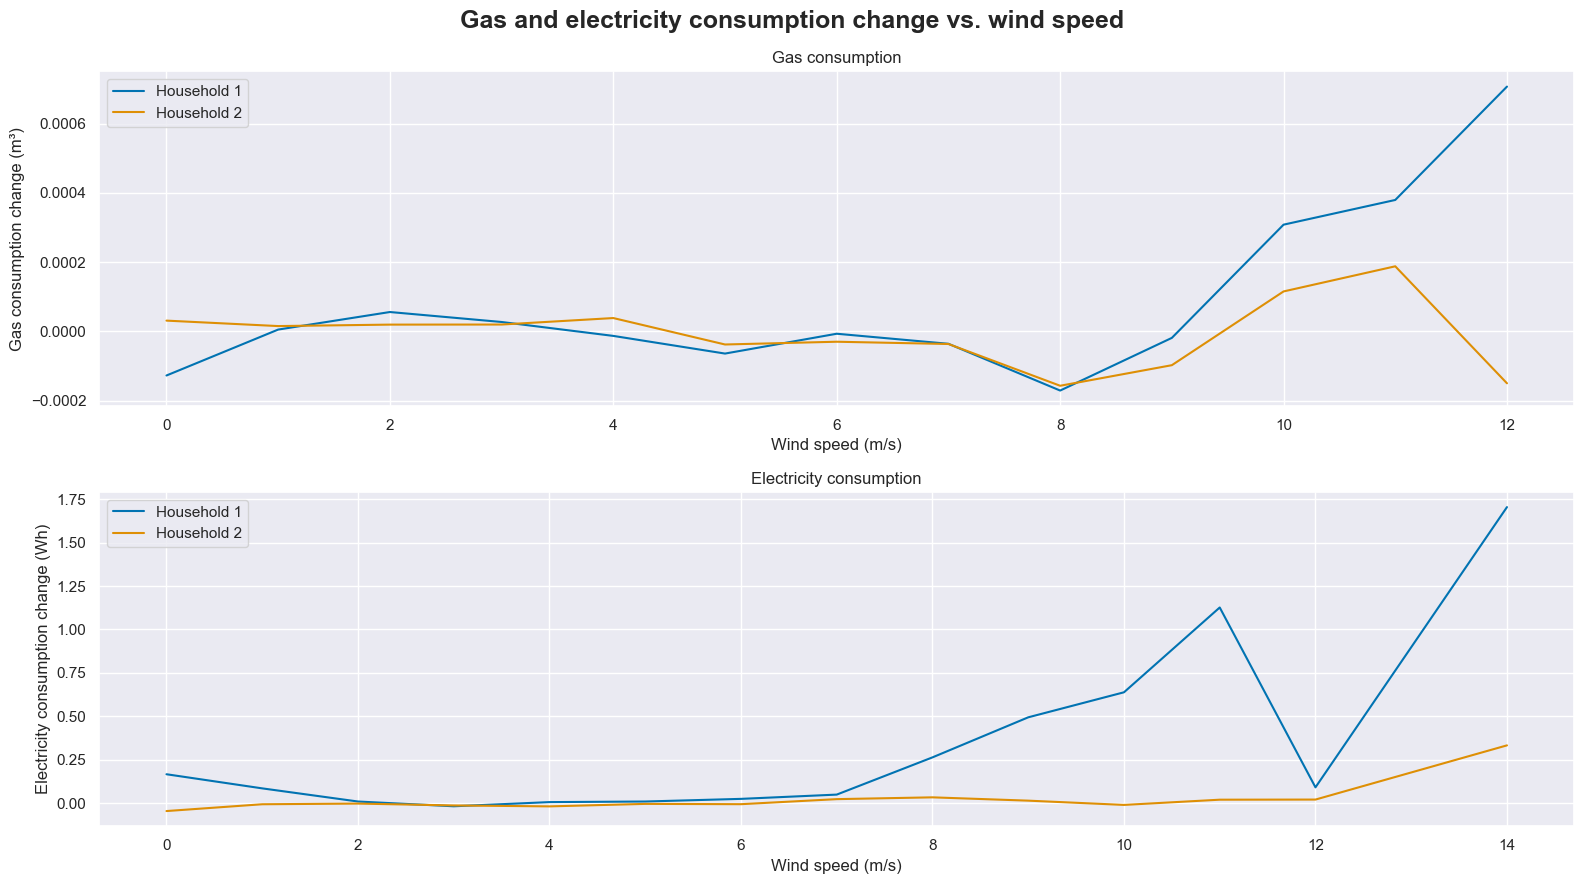

In [1881]:
fig, ax = plt.subplots(ncols=1, nrows=2)
sns.lineplot(data=df_household_1_filtered, x='wind_speed', y='gas_filtered_deriv', label='Household 1', errorbar=None, ax=ax[0])
sns.lineplot(data=df_household_2_filtered, x='wind_speed', y='gas_filtered_deriv', label='Household 2', errorbar=None, ax=ax[0])

sns.lineplot(data=df_household_1_filtered, x='wind_speed', y='electricity_filtered_deriv', label='Household 1', ax=ax[1], errorbar=None)
sns.lineplot(data=df_household_2_filtered, x='wind_speed', y='electricity_filtered_deriv', label='Household 2', ax=ax[1], errorbar=None)

plt.suptitle('Gas and electricity consumption change vs. wind speed', weight='bold', size=18)
ax[0].set_title('Gas consumption')
ax[1].set_title('Electricity consumption')
ax[0].set_ylabel('Gas consumption change (m³)')
ax[0].set_xlabel('Wind speed (m/s)')
ax[1].set_ylabel('Electricity consumption change (Wh)')
ax[1].set_xlabel('Wind speed (m/s)')

plt.tight_layout();
sns.set_palette('colorblind')


In [1882]:
observations_figure_3 = "Both households increase their gas consumption with increasing wind speed. But Household 1 has steeper increase in gas consumption compared to Household 2. With lower wind speed, the energy consumption in both households is stable."

In [1883]:
# df_household_1_filtered['gas_ma'] = df_household_1_filtered['gas_filtered'].rolling(window=96).median()
# df_household_2_filtered['gas_ma'] = df_household_2_filtered['gas_filtered'].rolling(window=96).median()

# df_household_1_filtered['temperature_filtered'] = df_household_1_filtered['temperature'].rolling(window=500).median()
# df_household_2_filtered['temperature_filtered'] = df_household_2_filtered['temperature'].rolling(window=500).median()

In [1884]:
# sns.lineplot(data=df_household_1_filtered, x='temperature_filtered', y='gas_filtered', label='Household 1', errorbar=None)
# sns.lineplot(data=df_household_2_filtered, x='temperature_filtered', y='gas_filtered', label='Household 2', errorbar=None)

In [1885]:
#// END_TODO [More-figures]

# Problem statement

1. This assignment is part of the CBL (challenge-based learning) line of the Bachelor program. As part of the challenge, you are to formulate your own problem statement (question) **related to the gas and/or electricity consumption** of an individual household. You may find inspiration in the results you obtained for GA1, in the knowledge from previous courses or from high school, the news, or just common sense. Formulate a question that you may reasonably be able to answer with the data you have here. The question should be interesting for other households as well, or it might be relevant for energy providers or in the context of energy transition (from gas to electricity).

   Store your problem statement as a string in the variable `problem_statement`.

   In case you find it hard to think of a problem statement, you could try thinking in one of the following directions. While you are welcome to use these ideas, take into account that you can earn bonus points for coming up with an interesting and original problem statement.
    1. Many people set their thermostat to a lower temperature at night than during the day. For example, at night, heating might be set to maintain the room temperature of 15 degrees Celsius, but during the day the thermostat is set to maintain the temperature at 20 degrees Celsius. You could write a problem statement related to the presence of such patterns in the data.
    1. You could create a prediction model for gas usage. The data you have here is very different from GA1, but you could train a regression model using weather and gas usage data and then explore potential bias of your model. For example: are there differences in model performance on colder days versus warmer days?

In [1888]:
#// BEGIN_TODO [Problem-statement] (0 points)

problem_statement = "Energy providers need to predict when energy consumption is  high or low to optimize their energy production and distribution. Specifically, understanding and measuring fluctuations in energy usage bring enormous benefits such as predicting and resolving outages. It is also important to understand how weather cirucmstances change the consumption. This analysis will help the energy provider to understand the energy consumption patterns of two households and predict their future energy consumption based on the peak hours of the day. What are the differences in energy consumption in different times of the day? How does the weather affect the energy consumption?"

In [1889]:
#// END_TODO [Problem-statement]

2. Now formulate a general hypothesis that could help to address the question from the problem statement that you have formulated. This hypothesis may only provide a part of the answer, but that is enough for this assignment. A good hypothesis for this assignment should lead to potentially useful insights. Ask yourself what you could learn depending on the outcomes of your hypothesis testing; how can the knowledge you created be used? The result is interesting, whether the hypothesis will be rejected or not. Remember that you cannot prove a causal relationship.

   Here is an example of a reasonable general hypothesis unrelated to this project: "Students who do sports perform better in their university studies.". You cannot be sure of the outcome of hypothesis testing in advance, and any outcome, rejecting the hypothesis or not, is interesting and relevant.

   Store your hypothesis as a string in the variable `hypothesis`.

In [1890]:
#// BEGIN_TODO [Hypothesis] (0 points)

hypothesis = "Daily energy fluctuatiions are more visible in bad weather than in good weather."

In [1891]:
#// END_TODO [Hypothesis]

3. Refine your general hypothesis into a **testable** hypothesis.

   **Ask questions**

   Carefully go over your hypothesis and note which parts are not sufficiently specific or not testable. You could write it down on paper and underline any words that could be more specific. For each of the underlined keywords, ask (write down) questions that could help specify this part. Even trivial things are welcome. You do not need to answer these questions right away; that comes in the next step. Questions can be:
   - What is this, exactly?
   - How can we choose a threshold value? Why is that a reasonable choice?
   - What should be measured to represent this keyword?
   - Is there enough data to test the hypothesis and to see a baseline?
   - What are confounding variables and how can we reduce the number of confounding variables?

   **Answer questions**

   Now start answering the questions from the previous step. You may also want to check the available data for some of them: when you make decisions you want to make sure you keep enough data. Even when you keep enough data, you still should check that you are not discarding too much.

   You can find an elaborate refinement of the example hypothesis "Students who do sports perform better in their university studies." in `Example_hypothesis_refinement.pdf` which was included in the ZIP of this assignment.

   Store your refined hypothesis as a string in the variable `refined_hypothesis`. Keep your notes, as they may be useful for the poster.

In [1892]:
#// BEGIN_TODO [Refined-hypothesis] (0 points)

refined_hypothesis = "The daily difference in electricity consumption (Wh) between peak hours (6 PM-10 PM) and off-peak hours (12 AM-6 AM) is significantly greater on days with temperatures below the median daily temperature compared to days with temperatures above the median daily temperature."

In [1893]:
#// END_TODO [Refined-hypothesis]

# Identify atypical periods

In this section, you will identify periods of atypical energy consumption that you would possibly like to eliminate from consideration when testing your hypothesis. Including atypical data into the data sample for testing your hypothesis might lead to wrong results. Depending on your hypothesis, you may end up with different definitions of what is atypical. This data set has at least one clear form of atypical data, already visible in Section 7 (Taking a first look at the data). There are periods when energy consumption is much lower than surrounding periods: less gas and/or electricity was used than just before and after that period. Perhaps the people who live in this house were away on holiday. Whatever the case may be, these periods are not representative of normal use of gas and electricity.

The first plots from Section 7 (Taking a first look at the data) showing all data values (per hour) are difficult to read and interpret, since the data is too volatile. The task to perform using visual inspection is to see when the houses were presumably empty.
* When people are not away, we expect to see at least some period during that day when more electricity was used than only by fridges, TVs in standby mode, etc.
* The same holds for gas: if people are away, they might put their thermostat a bit lower (or not), still consuming some gas for heating in winter, but not for taking showers or cooking.

The active gas/electricity usage periods would manifest themselves in different typical values or in different high values.

To make plots more readable, filtering data or aggregating data is often a good step. In this case, you will aggregate the data per day, but which value do you want to compute for each day? Taking the minimum value of the day is not likely to be interesting: nearly all households have some period of a day when consumption is very low. Taking the maximum value might work, but there could be outliers, making days with very low energy consumption look like a regular day. A good alternative would be to take something *near* the maximum value: a high quantile, for example (look at the EDA programming exercises if needed to refresh your knowledge).

1. Compute daily peak consumption of gas and electricity per day for each of the two households and store them in `df_daily_peak_household_1` and `df_daily_peak_household_2`. Make sure that the index for both dataframes is using the `date` column and is still in datetime format.

   When looking for atypical data, days with too much missing data could give unreliable or distorted results. It is better to filter those days out. Check if it is necessary to filter out days with too many missing values for either or both of the two households. Store your explanations of what daily value you computed and why this one, and which days you filtered out and why those ones as a string in the variable `daily_filter_missing_reasoning`.

In [1894]:
df_household_1_filtered.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2013-01-01 01:00:00 to 2014-01-01 00:00:00
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date                        8760 non-null   datetime64[ns]
 1   gas                         8757 non-null   float64       
 2   electricity                 8759 non-null   float64       
 3   temperature                 8760 non-null   float64       
 4   wind_speed                  8760 non-null   float64       
 5   missing                     8760 non-null   bool          
 6   gas_filtered                7605 non-null   float64       
 7   electricity_filtered        8375 non-null   float64       
 8   gas_filtered_deriv          8469 non-null   float64       
 9   electricity_filtered_deriv  8559 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(8)
memory usage: 692.9 KB


In [1895]:
#// BEGIN_TODO [Daily-peaks] (4 points)
# Remove missing values
df_household_1_ = df_household_1_filtered.copy().dropna(subset=['gas', 'electricity'])
df_household_2_ = df_household_2_filtered.copy().dropna(subset=['gas', 'electricity'])
# Group by date
df_daily_peak_household_1 = df_household_1_.groupby('date')[["gas", 'electricity']].quantile(0.95)

df_daily_peak_household_2 = df_household_2_.groupby('date')[["gas", 'electricity']].quantile(0.95)

In [1896]:
df_daily_peak_household_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2013-01-01 to 2013-12-31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gas          365 non-null    float64
 1   electricity  365 non-null    float64
dtypes: float64(2)
memory usage: 8.6 KB


In [1897]:
# group_household_1 = df_household_1.groupby('date').agg({'electricity': ['mean', 'median', 'max'], 'gas': ['mean', 'median', 'max']})


In [1898]:
daily_filter_missing_reasoning ="The missing values were removed from the data before calculating the daily peaks. The reason behind that was because missing data makes the conclusions distorted or unreliable. The daily peaks were calculated by taking the 95th percentile of the gas and electricity consumption for each day. This is done to remove the effect of outliers and to focus on the highest consumption values."	

In [1899]:
#// END_TODO [Daily-peaks]

<Axes: xlabel='date'>

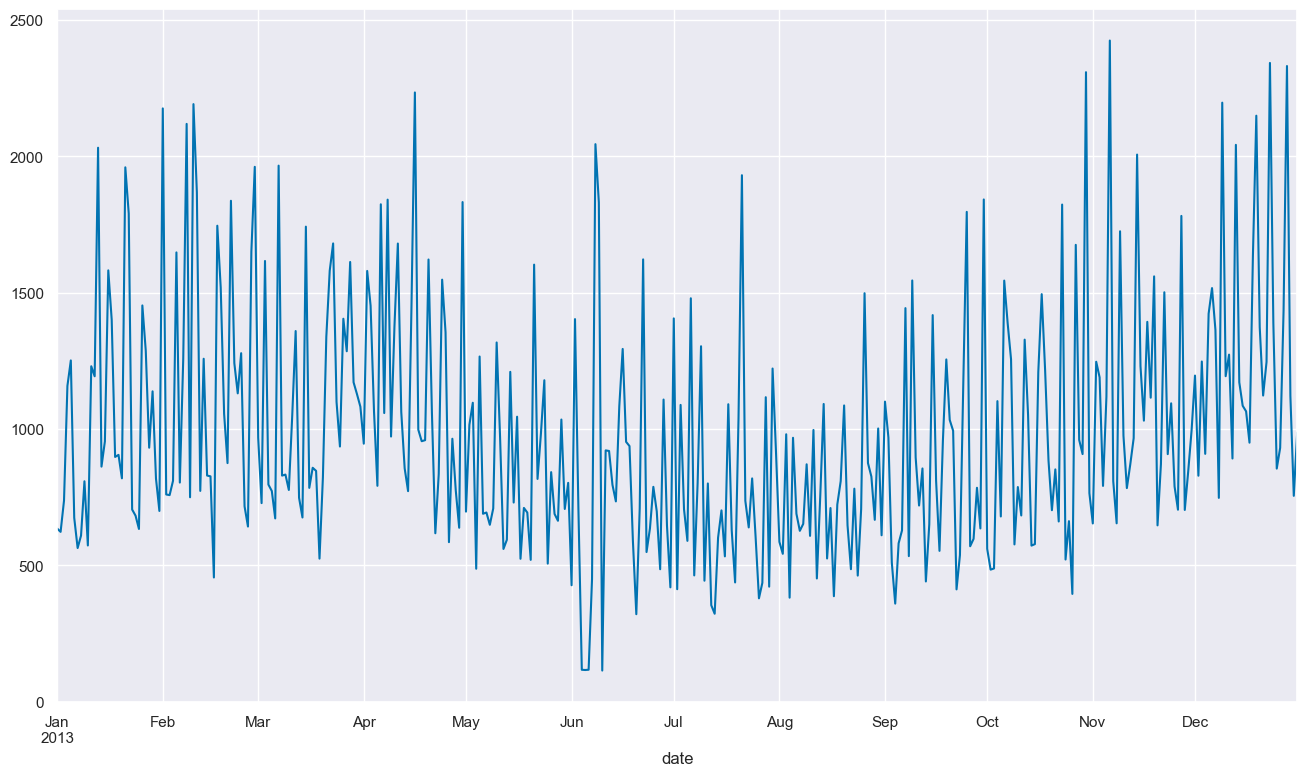

In [1900]:
df_daily_peak_household_1["electricity"].plot()

In [1901]:
df_daily_peak_household_1.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2013-12-22', '2013-12-23', '2013-12-24', '2013-12-25',
               '2013-12-26', '2013-12-27', '2013-12-28', '2013-12-29',
               '2013-12-30', '2013-12-31'],
              dtype='datetime64[ns]', name='date', length=365, freq=None)

2. Plot the daily peak consumption. Create a figure with four line plots -- two showing hourly gas consumption and two showing electricity consumption side-by-side for each household for the entire year.

In [1902]:
# df_household_1_peak = df_household_1[df_household_1.index.isin(df_daily_peak_household_1.index)]
# df_household_2_peak = df_household_2[df_household_2.index.isin(df_daily_peak_household_2.index)]


In [1903]:
df_daily_peak_household_11 = df_household_1_.groupby('date')


In [1904]:
# df_daily_peak_household_11['is_peak'] = (df_daily_peak_household_11['electricity'] > df_daily_peak_household_11['electricity'].shift(1)) & (df_daily_peak_household_11['electricity'] > df_daily_peak_household_11['electricity'].shift(-1))

In [1905]:
# df_household_1_[df_household_1_["is_peak"] == True].plot(y='electricity', kind='line', x='date')

In [1906]:
#// BEGIN_TODO [Daily-peaks-plots] (2 points)

In [1907]:
bm_hourly_1 = df_household_1_["date"].isin(df_daily_peak_household_1.index)
bm_hourly_2 = df_household_2_["date"].isin(df_daily_peak_household_2.index)

In [1908]:
bm_hourly_1

datetime
2013-01-01 01:00:00    True
2013-01-01 02:00:00    True
2013-01-01 03:00:00    True
2013-01-01 04:00:00    True
2013-01-01 05:00:00    True
                       ... 
2013-12-31 19:00:00    True
2013-12-31 20:00:00    True
2013-12-31 21:00:00    True
2013-12-31 22:00:00    True
2013-12-31 23:00:00    True
Name: date, Length: 8757, dtype: bool

In [1909]:
# df_household_1[df_household_1_["date"].isin(df_daily_peak_household_1.index)]

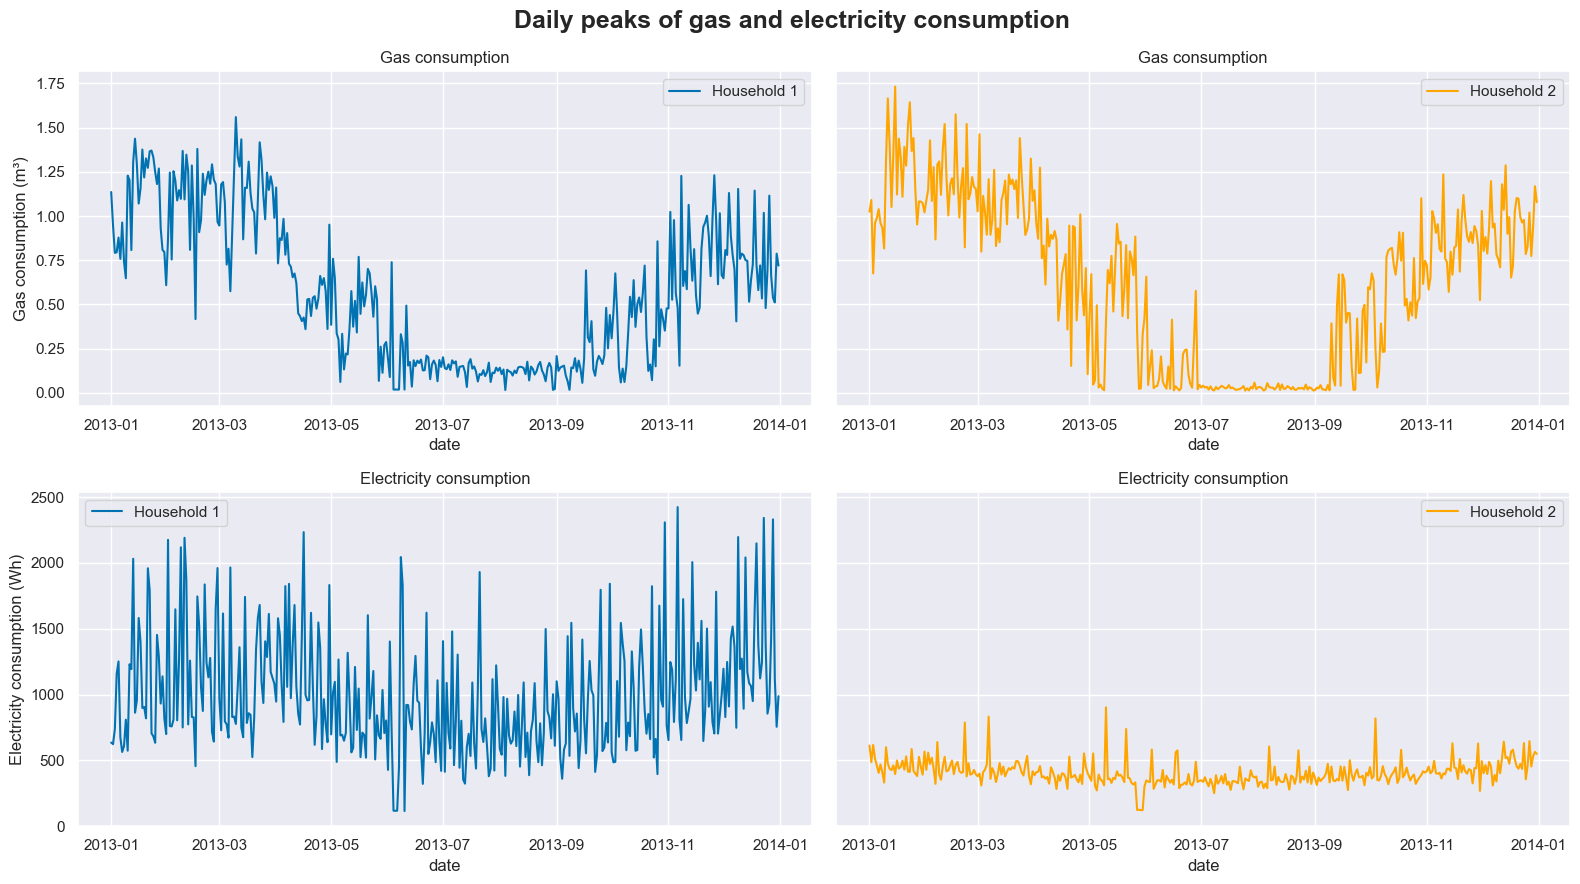

In [1910]:
fig, ax = plt.subplots(ncols=2, nrows=2, sharey='row')
sns.lineplot(data=df_daily_peak_household_1, x=df_daily_peak_household_1.index, y='gas', ax=ax[0,0], label='Household 1')
sns.lineplot(data=df_daily_peak_household_2, x=df_daily_peak_household_2.index, y='gas', ax=ax[0,1], label='Household 2', color='orange')
sns.lineplot(data=df_daily_peak_household_1, x=df_daily_peak_household_1.index, y='electricity', ax=ax[1,0], label='Household 1')
sns.lineplot(data=df_daily_peak_household_2, x=df_daily_peak_household_2.index, y='electricity', ax=ax[1,1], label='Household 2', color='orange')

ax[0,0].set_title('Gas consumption')
ax[0,1].set_title('Gas consumption')
ax[0,0].set_ylabel('Gas consumption (m³)')
ax[1,0].set_title('Electricity consumption')
ax[1,1].set_title('Electricity consumption')
ax[1,0].set_ylabel('Electricity consumption (Wh)')
plt.suptitle('Daily peaks of gas and electricity consumption', weight='bold', size=18)
plt.tight_layout();


In [1911]:
#// END_TODO [Daily-peaks-plots]

3. The plots from `df_daily_peak_household_1` and `df_daily_peak_household_2` make it easier to identify periods of atypical energy consumption, but there are still days where it is unclear if it is actually atypical or not.

   Use the following space to create plots to zoom in on interesting periods. Think of applying some filter, e.g., Gaussian filter or median filter, to identify interesting periods.

In [1912]:
#// BEGIN_TODO [Atypical-zoom] (4 points)

In [1913]:
df_daily_peak_household_1['filtered_gas_der'] = gaussian_filter1d(df_daily_peak_household_1['gas'], sigma=5, mode='nearest', order=1)
df_daily_peak_household_1['filtered_gas'] = gaussian_filter1d(df_daily_peak_household_1['gas'], sigma=3, mode='nearest')
df_daily_peak_household_1['median_gas'] = df_daily_peak_household_1["gas"].rolling(3).median()
df_daily_peak_household_2['filtered_gas_der'] = gaussian_filter1d(df_daily_peak_household_2['gas'], sigma=5, mode='nearest', order=1)
df_daily_peak_household_2['filtered_gas'] = gaussian_filter1d(df_daily_peak_household_2['gas'], sigma=3, mode='nearest')
df_daily_peak_household_2['median_gas'] = df_daily_peak_household_2["gas"].rolling(3).median()


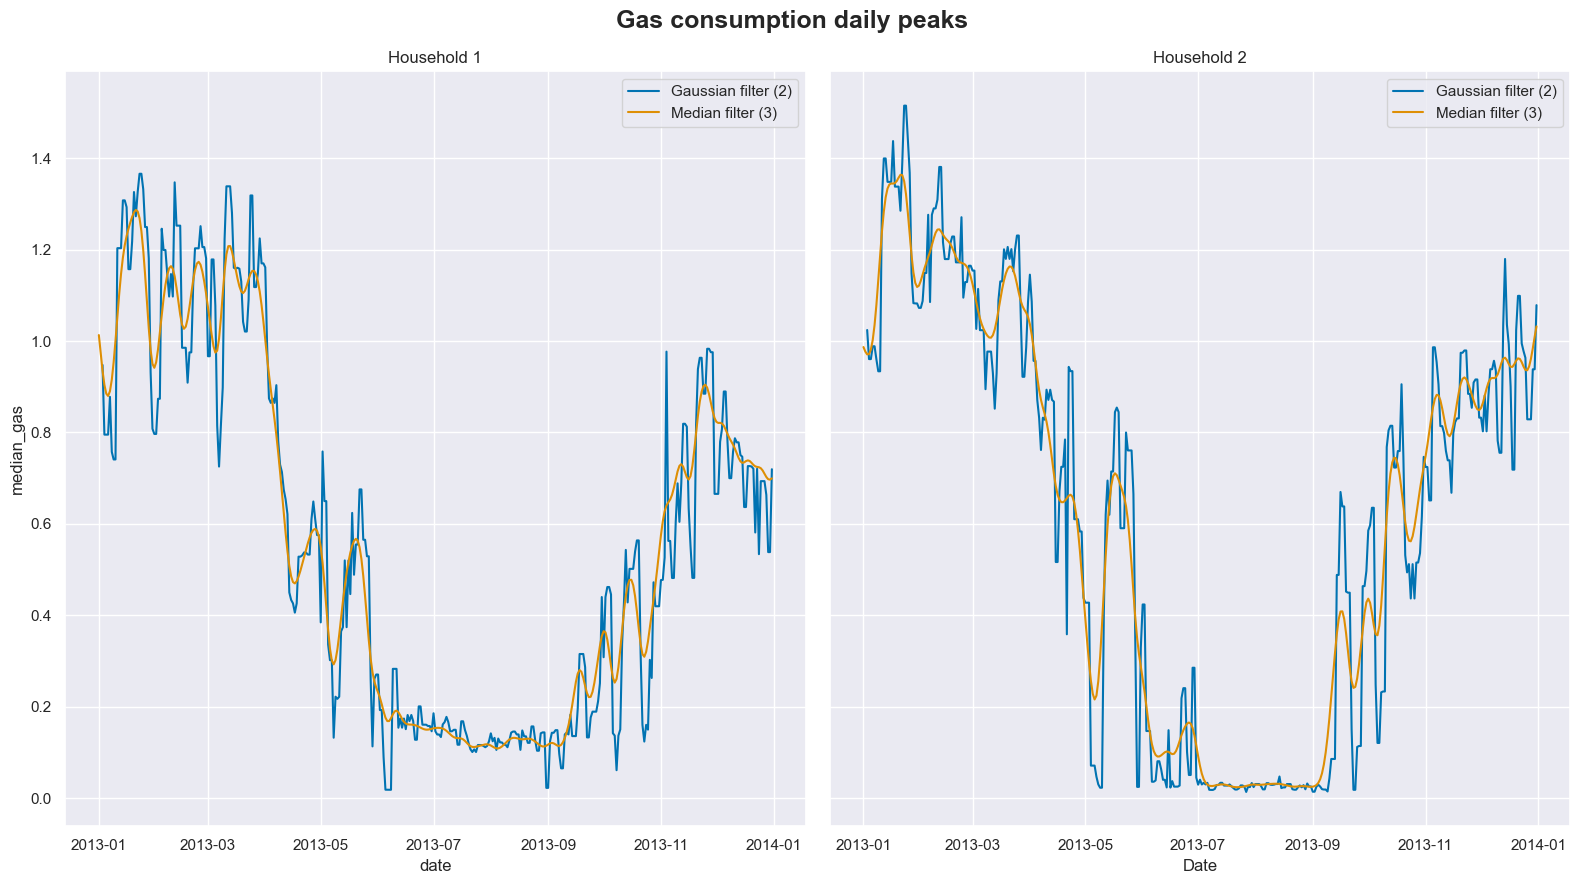

In [1914]:
fig, ax = plt.subplots(ncols=2, nrows=1, sharey='row')
sns.lineplot(data=df_daily_peak_household_1, x='date', y='median_gas', label='Gaussian filter (2)', ax=ax[0])
sns.lineplot(data=df_daily_peak_household_1, x='date', y='filtered_gas', label='Median filter (3)', ax=ax[0])

sns.lineplot(data=df_daily_peak_household_2, x='date', y='median_gas', label='Gaussian filter (2)', ax=ax[1])
sns.lineplot(data=df_daily_peak_household_2, x='date', y='filtered_gas', label='Median filter (3)', ax=ax[1])

ax[0].set_title('Household 1')
ax[1].set_title('Household 2')


plt.suptitle('Gas consumption daily peaks', weight='bold', size=18)
plt.ylabel('Gas consumption (m³)')
plt.xlabel('Date')
plt.tight_layout();

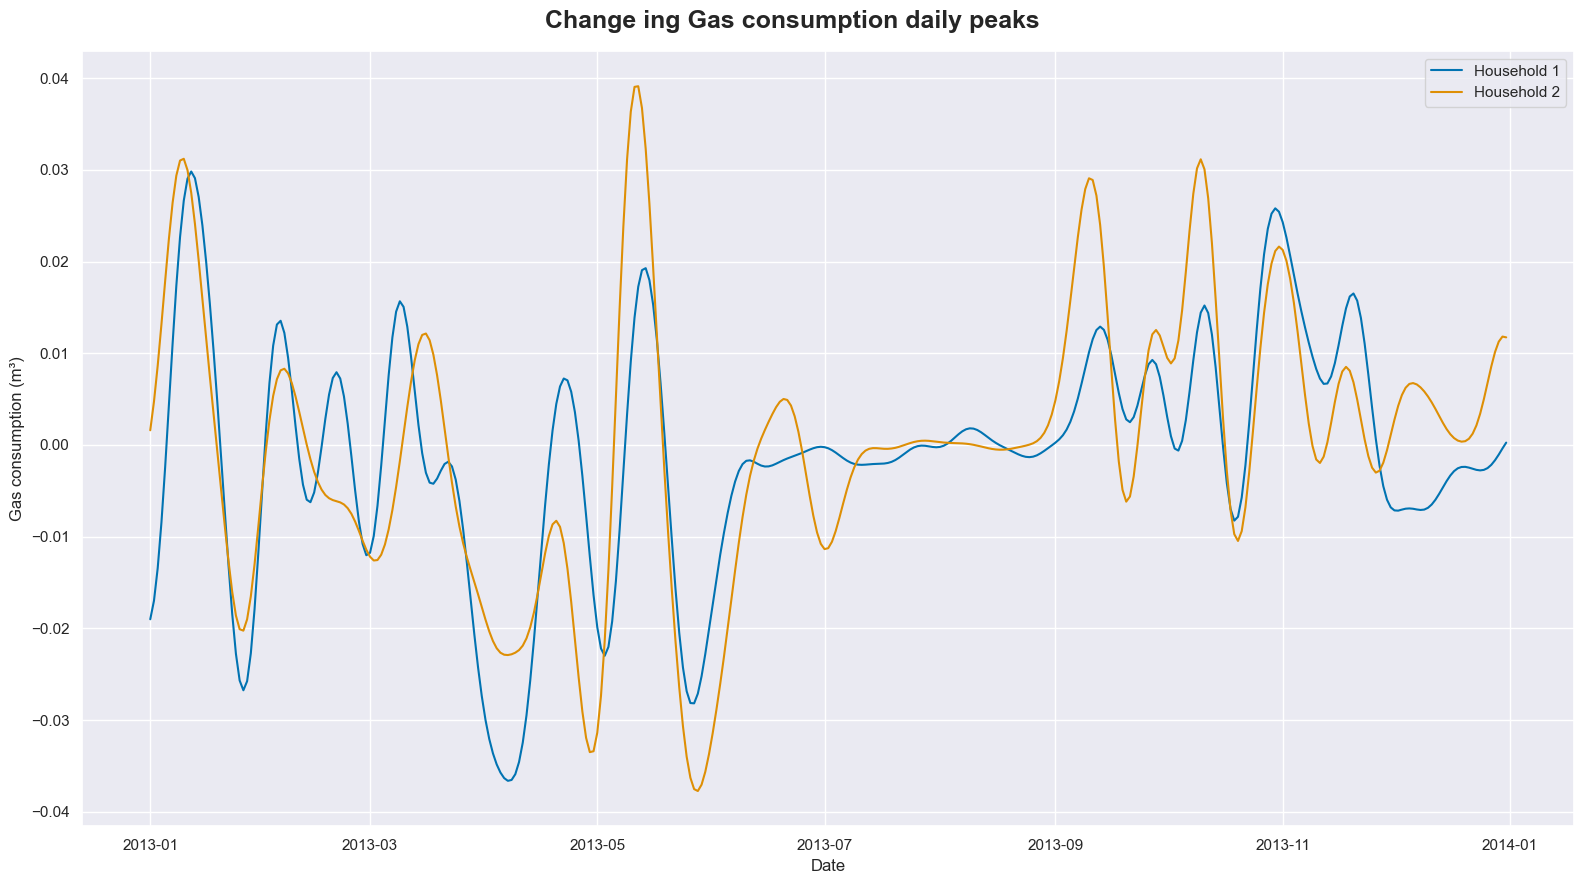

In [1915]:
sns.lineplot(data=df_daily_peak_household_1, x='date', y='filtered_gas_der', label='Household 1')
sns.lineplot(data=df_daily_peak_household_2, x='date', y='filtered_gas_der', label='Household 2')

plt.suptitle('Change ing Gas consumption daily peaks', weight='bold', size=18)
plt.ylabel('Gas consumption (m³)')
plt.xlabel('Date')

plt.tight_layout();

ELECTRICITY

In [1916]:
df_daily_peak_household_1['filtered_electricity_der'] = gaussian_filter1d(df_daily_peak_household_1['electricity'], sigma=5, mode='nearest', order=1)
df_daily_peak_household_1['filtered_electricity'] = gaussian_filter1d(df_daily_peak_household_1['electricity'], sigma=3, mode='nearest')
df_daily_peak_household_1['median_electricity'] = df_daily_peak_household_1["electricity"].rolling(15).median()

df_daily_peak_household_2['filtered_electricity_der'] = gaussian_filter1d(df_daily_peak_household_2['electricity'], sigma=5, mode='nearest', order=1)
df_daily_peak_household_2['filtered_electricity'] = gaussian_filter1d(df_daily_peak_household_2['electricity'], sigma=3, mode='nearest')
df_daily_peak_household_2['median_electricity'] = df_daily_peak_household_2["electricity"].rolling(15).median()


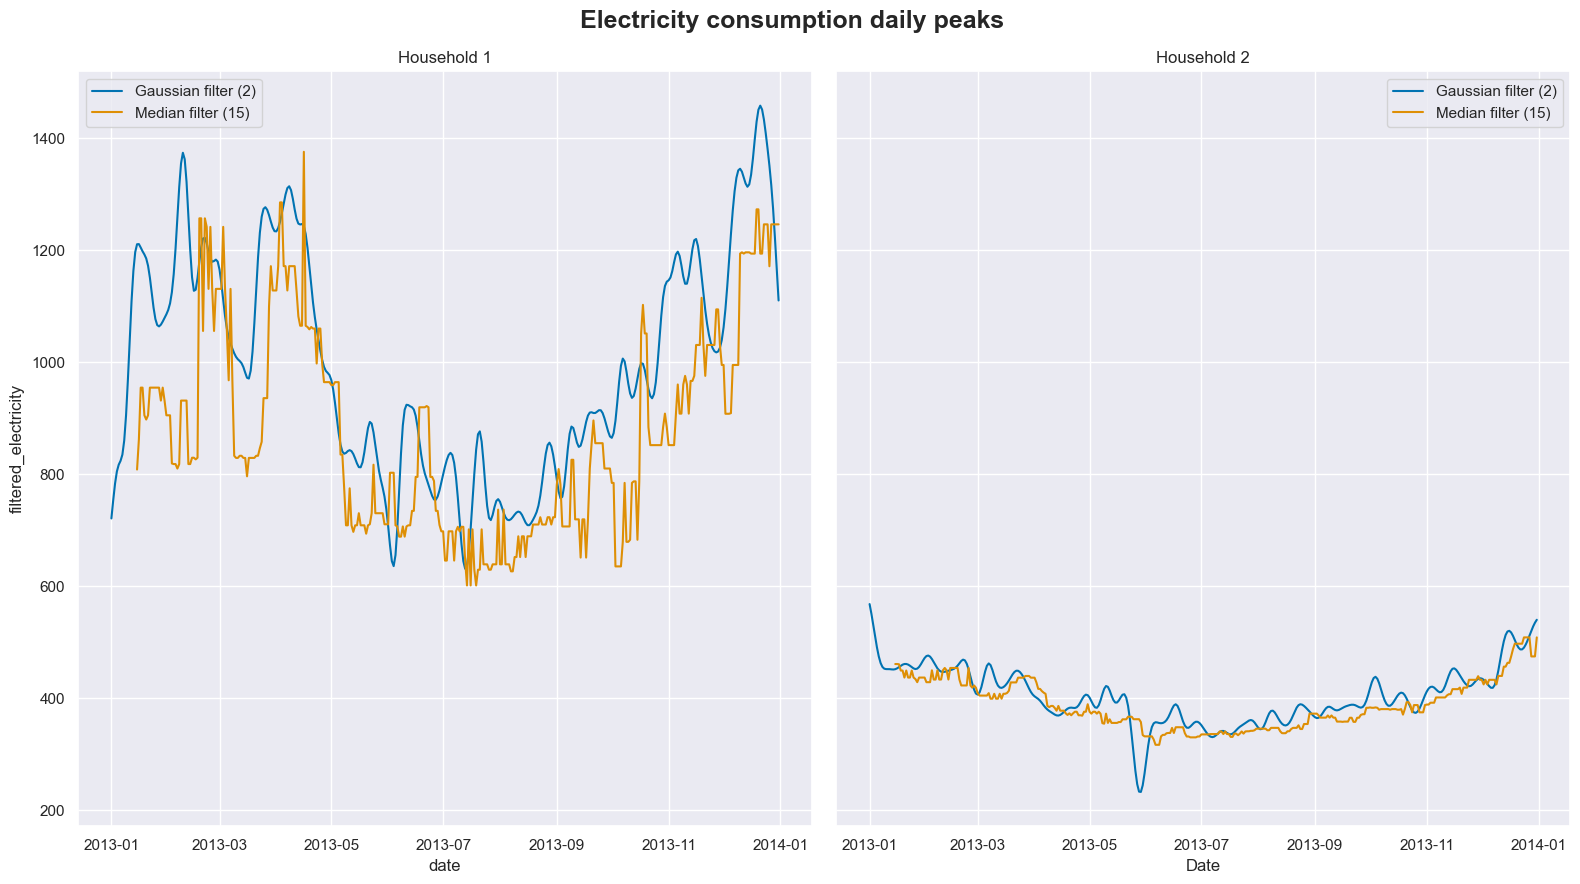

In [1917]:
fig, ax = plt.subplots(ncols=2, nrows=1, sharey='row')
sns.lineplot(data=df_daily_peak_household_1, x='date', y='filtered_electricity', label='Gaussian filter (2)', ax=ax[0])
sns.lineplot(data=df_daily_peak_household_1, x='date', y='median_electricity', label='Median filter (15)', ax=ax[0])

sns.lineplot(data=df_daily_peak_household_2, x='date', y='filtered_electricity', label='Gaussian filter (2)', ax=ax[1])
sns.lineplot(data=df_daily_peak_household_2, x='date', y='median_electricity', label='Median filter (15)', ax=ax[1])

ax[0].set_title('Household 1')
ax[1].set_title('Household 2')

plt.suptitle('Electricity consumption daily peaks', weight='bold', size=18)
plt.ylabel('Electricity consumption (Wh)')
plt.xlabel('Date')

plt.tight_layout();

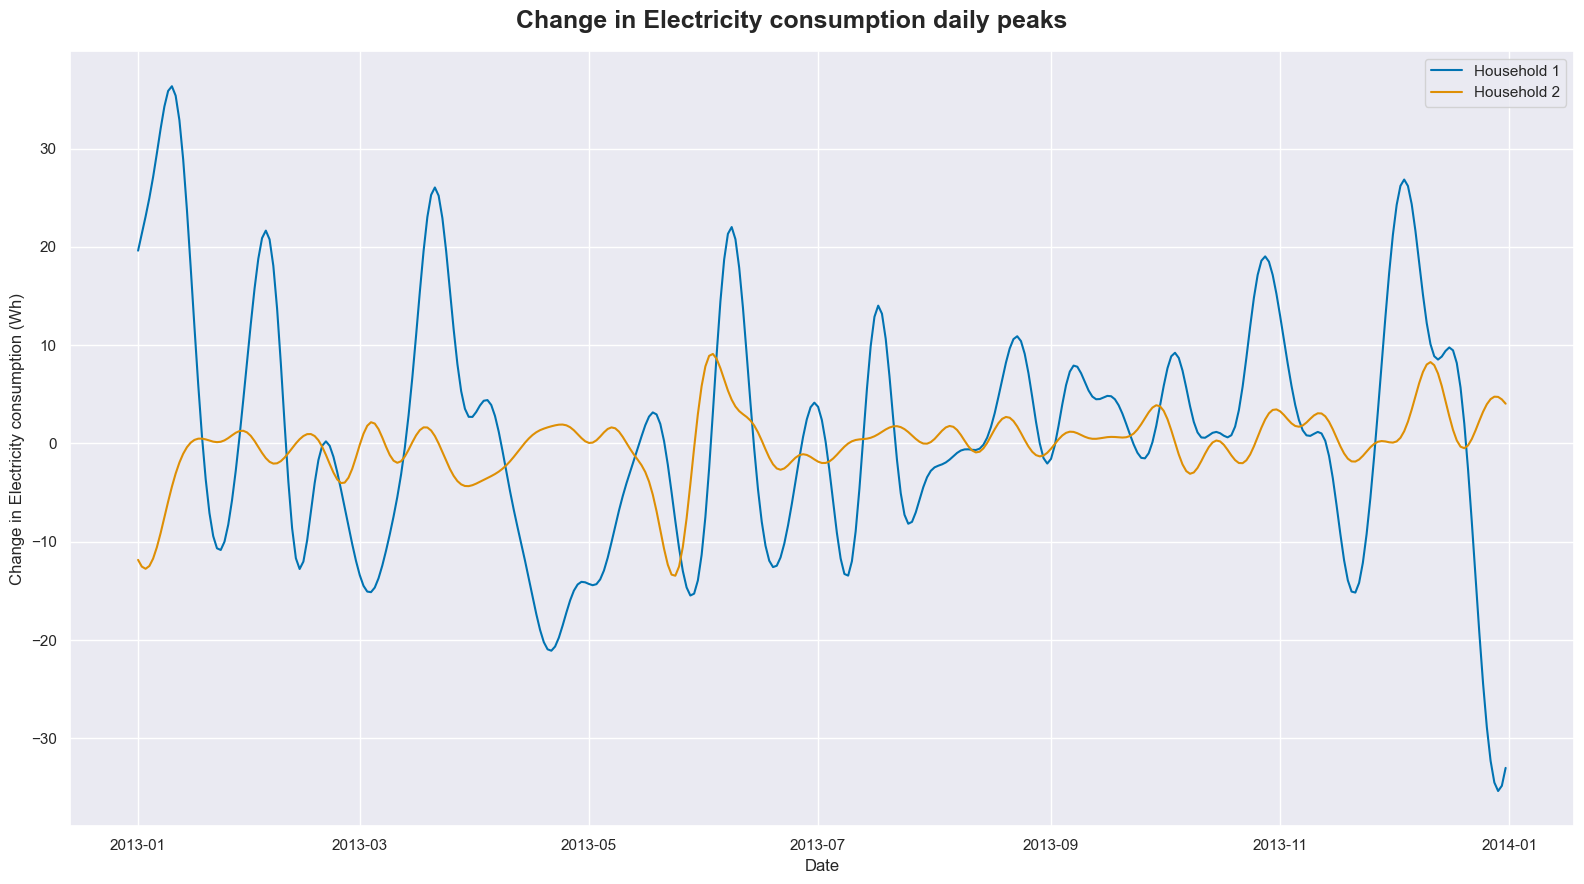

In [1918]:
sns.lineplot(data=df_daily_peak_household_1, x='date', y='filtered_electricity_der', label='Household 1')
sns.lineplot(data=df_daily_peak_household_2, x='date', y='filtered_electricity_der', label='Household 2')

plt.suptitle('Change in Electricity consumption daily peaks', weight='bold', size=18)
plt.ylabel('Change in Electricity consumption (Wh)')
plt.xlabel('Date')

plt.tight_layout();

In [1919]:
#// END_TODO [Atypical-zoom]

4. Create a Series object for each household `s_atypical_1` and `s_atypical_2` with all the dates of the year as index, and values `True` and `False` representing if you find that the energy consumption on that day looks atypical. You may create these Series objects by hand. Such an object could be created like this:

   `s_atypical_1 = pd.Series(index=df_household_1['date'].unique()).fillna(False)`

   Here, `pd.Series()` creates a new Series object, using the unique values from the `date` column of `df_household_1` as index. As no data is given, the object is initialized with NaN values. `fillna(False)` fills these NaN values with `False`. You can then set particular dates or ranges of dates in the Series object to `True` by hand.

   It may be very useful to zoom in on particular days in the plots above, so feel free to do that. Be mindful of the filters you are using and check your suspicions with the hourly data. When you are confident that consumption for a particular house for a particular period is atypical, set the values in the Series object for that household for those days to `True`. Repeat this process until you can no longer find periods with atypical behavior for either household.

   Write down your reasons for marking periods as atypical and store it as a string in the variable `atypical_reasons`. Did you find different kinds of atypical behavior?

In [1920]:
#// BEGIN_TODO [Atypical-series] (3 points)

In [1921]:
#'2013-05-30', '2013-05-21', '2013-05-10','2013-02-22', '2013-03-07', , '2013-10-04', '2013-05-27',
dates_electricity_1 = ['2013-08-07']
#'2013-01-09', '2013-02-16', '2013-03-10', '2013-11-26', '2013-10-06',
dates_gas_1 = ['2013-05-06', '2013-10-08', '2013-10-21', '2013-10-23', '2013-11-07']

#'2013-02-22', '2013-03-07', '2013-05-10', '2013-05-21','2013-05-27', '2013-05-28', '2013-05-29', '2013-05-30',
dates_electricity_2 = ['2013-08-07', '2013-10-04']
# '2013-03-24', '2013-01-03','2013-09-23', '2013-06-07', '2013-09-22','2013-05-26',
dates_gas_2 = ['2013-04-21', '2013-04-30','2013-05-03','2013-05-28','2013-06-02', '2013-06-06','2013-10-05']

atypical_dates_1 = dates_electricity_1 + dates_gas_1
atypical_dates_2 = dates_electricity_2 + dates_gas_2

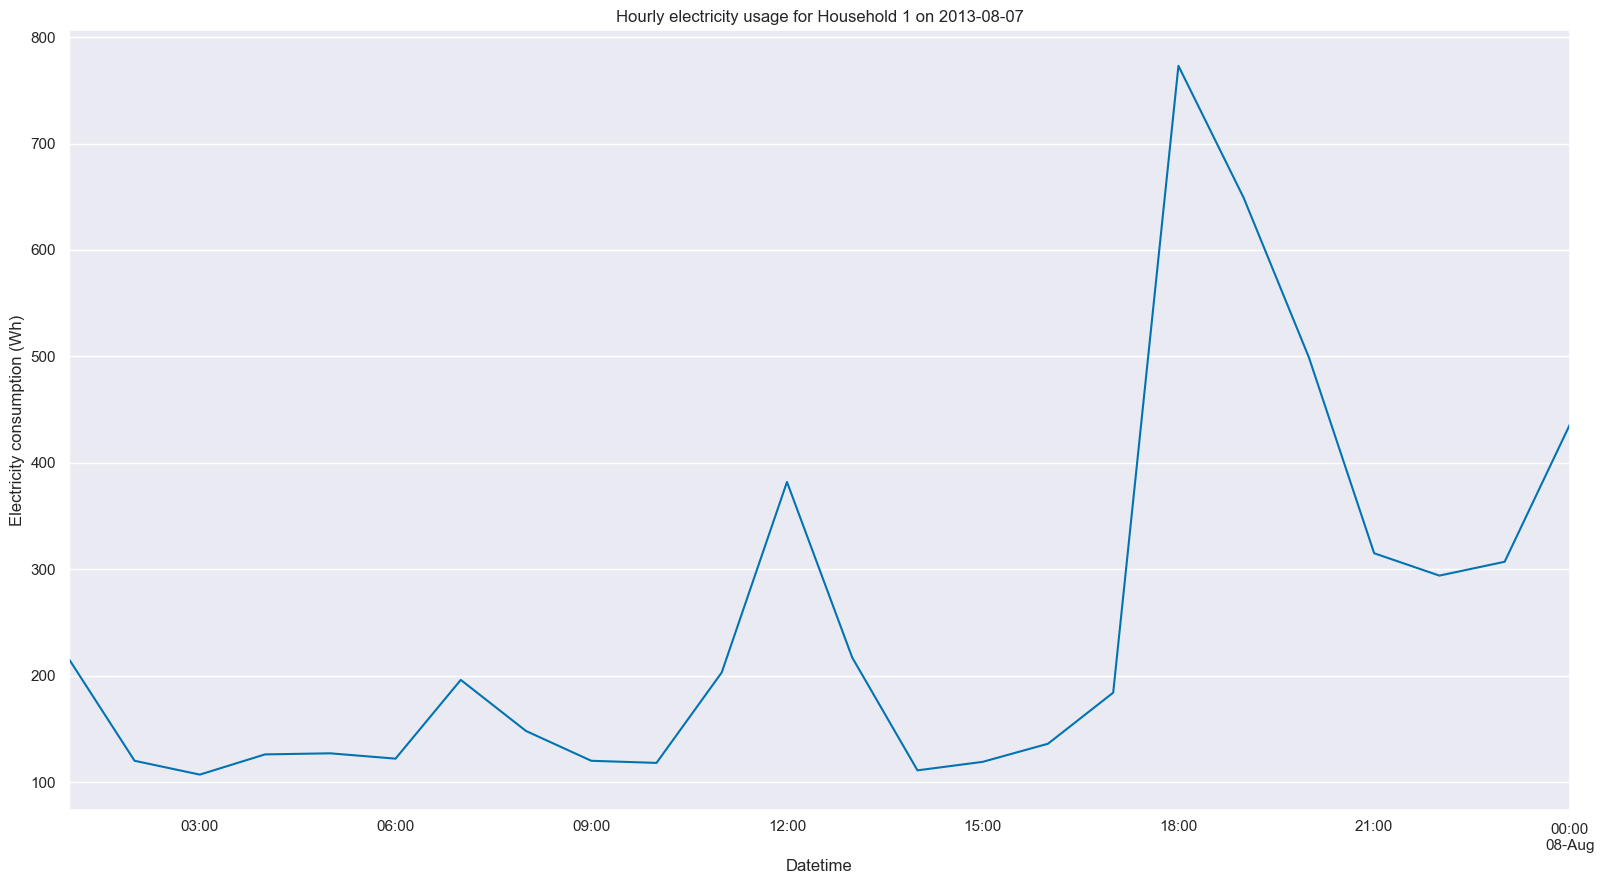

In [1922]:
for i in dates_electricity_1:
    df_household_1[df_household_1['date'] == i]['electricity'].plot()
    plt.title(f"Hourly electricity usage for Household 1 on {i}")
    plt.tight_layout()
    plt.xlabel('Datetime')
    plt.ylabel('Electricity consumption (Wh)')
    plt.show()

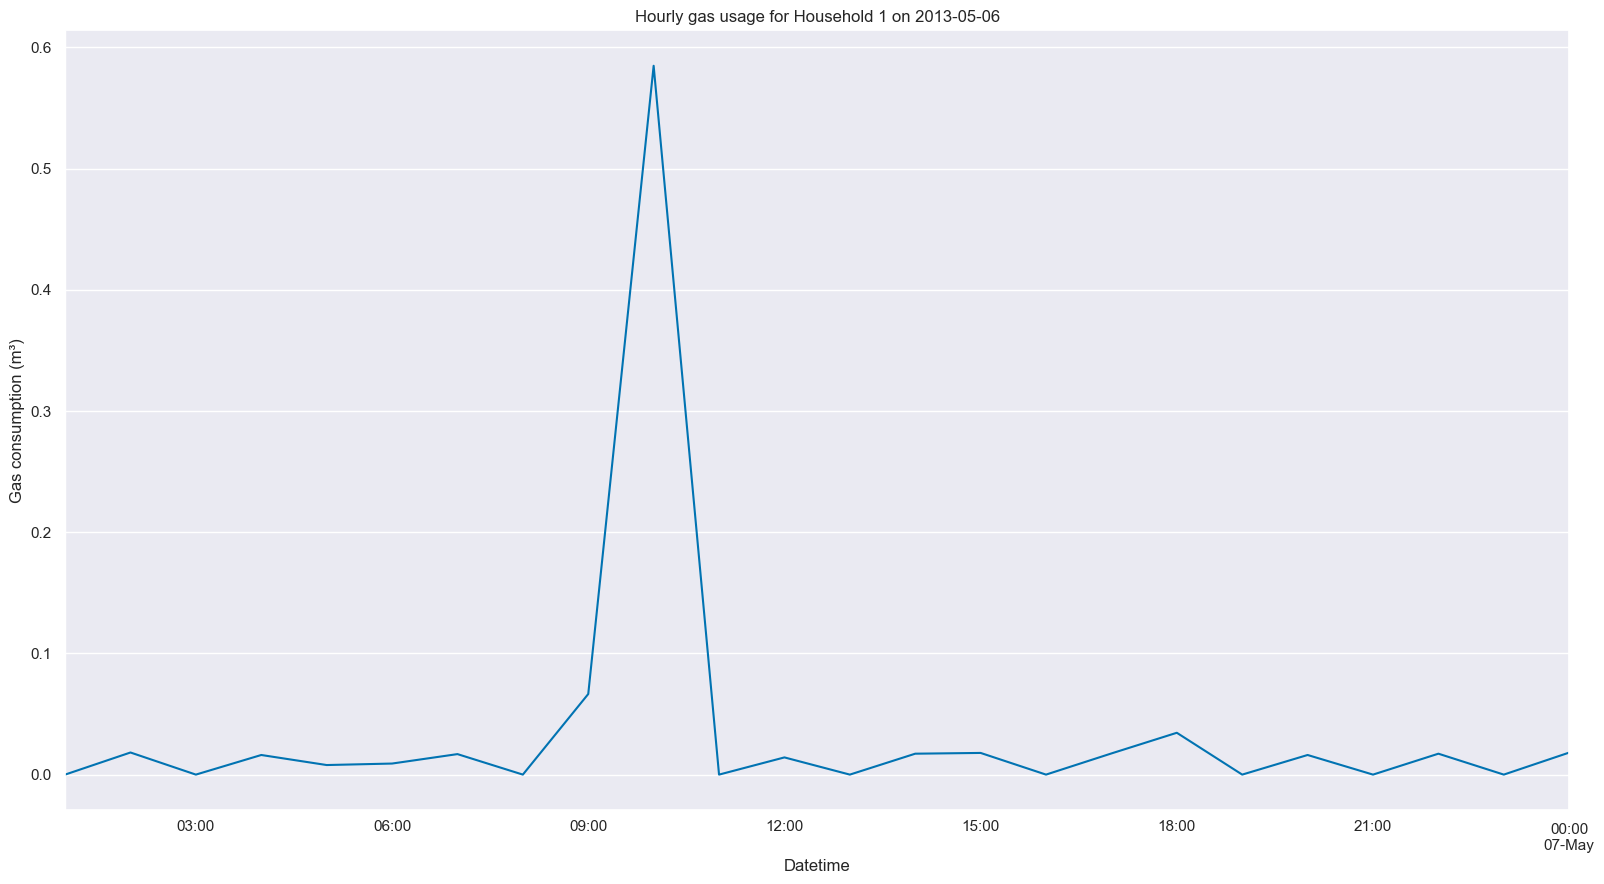

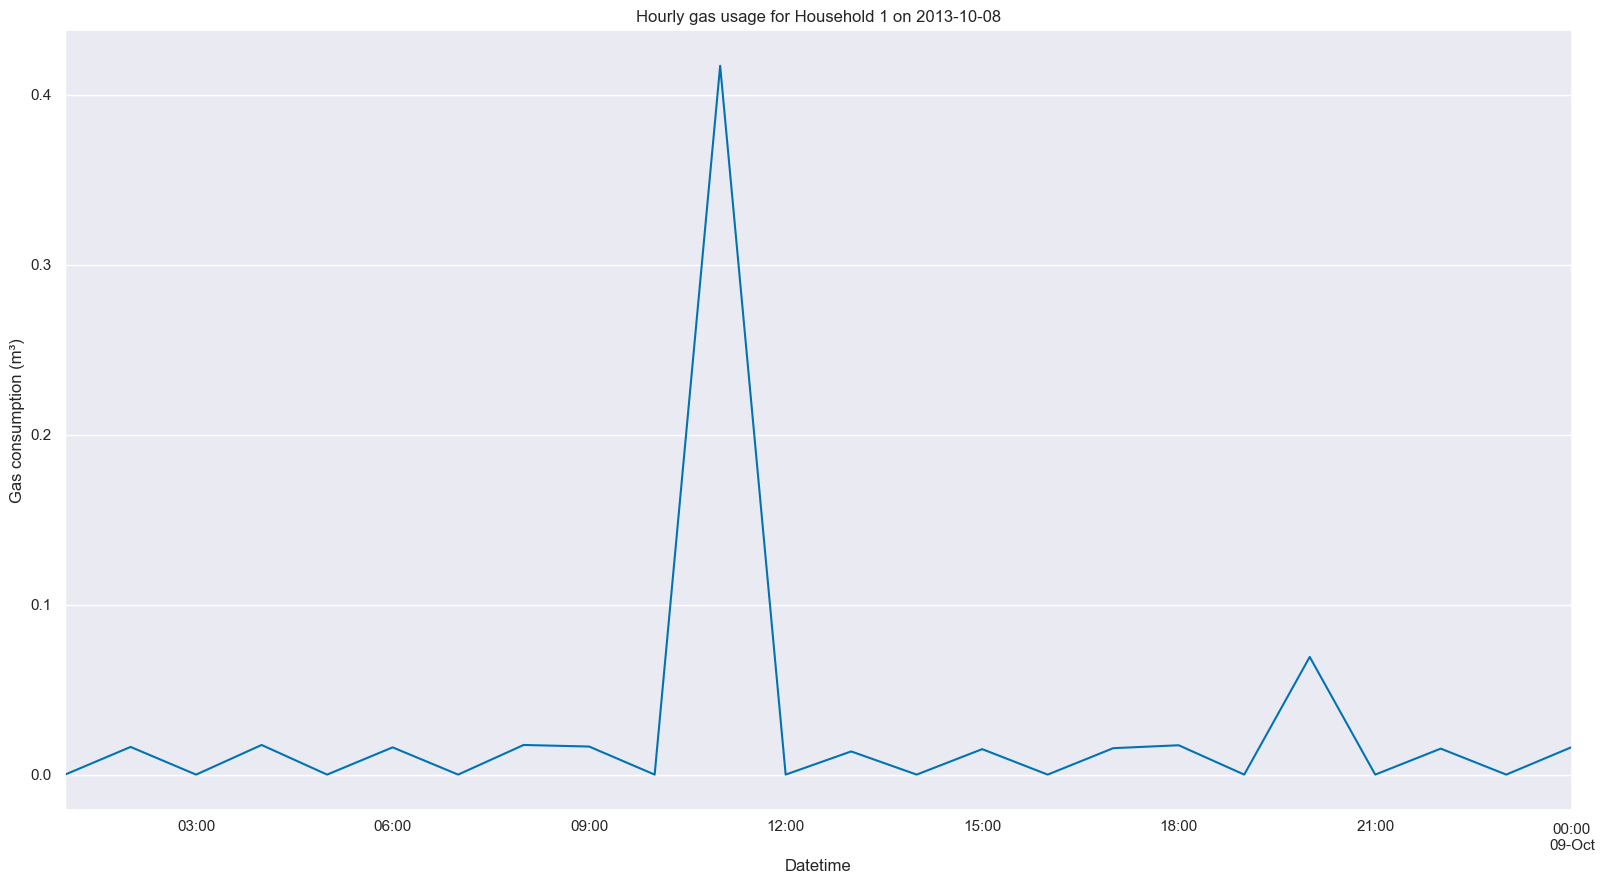

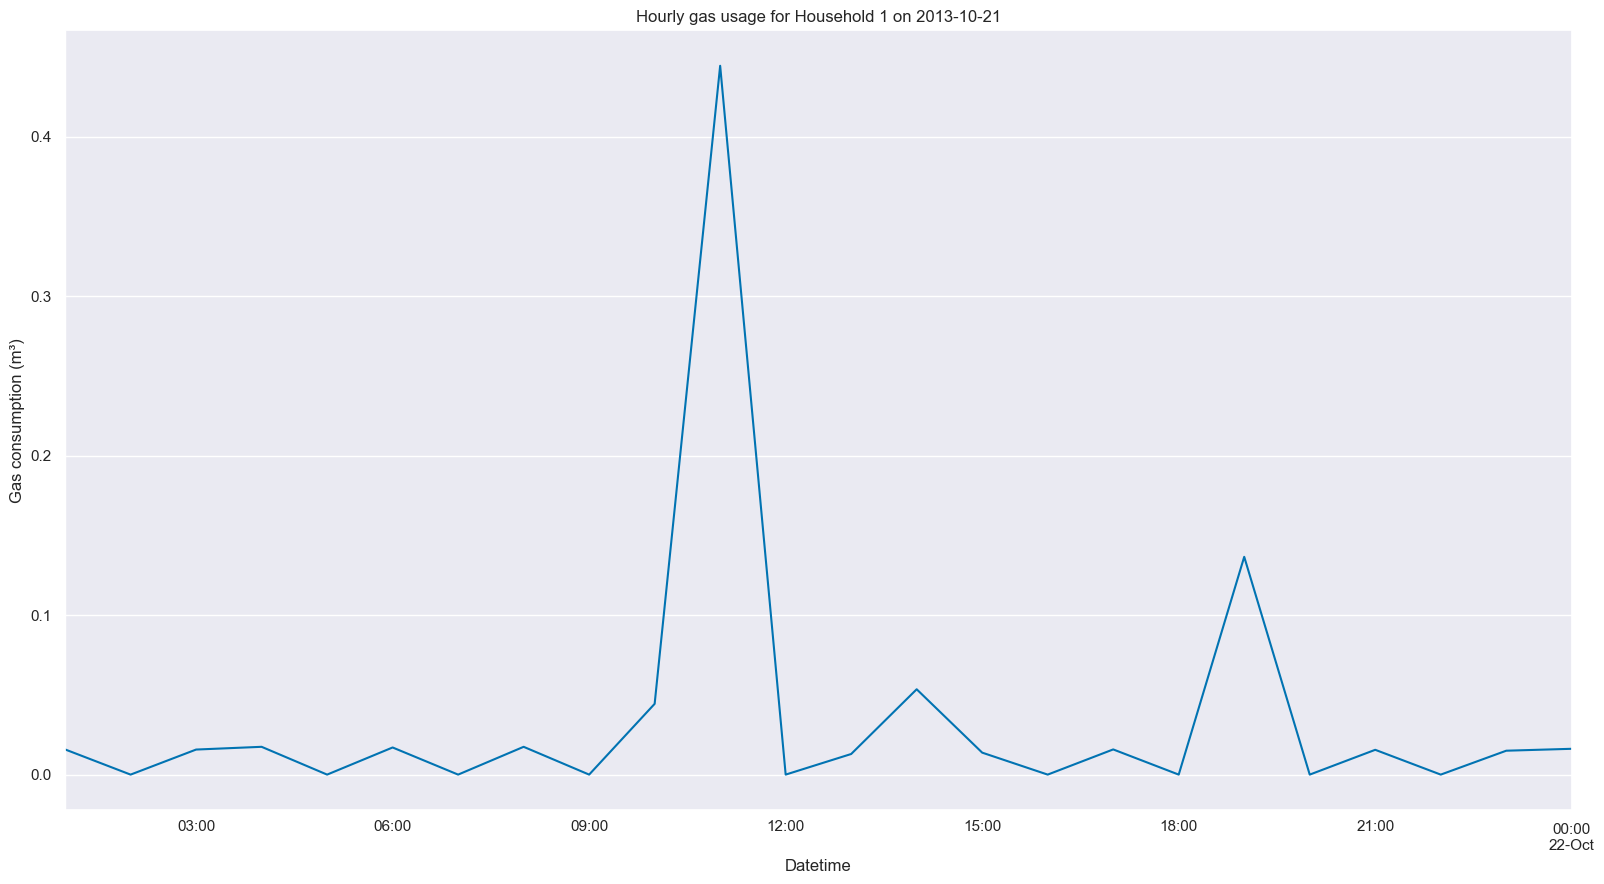

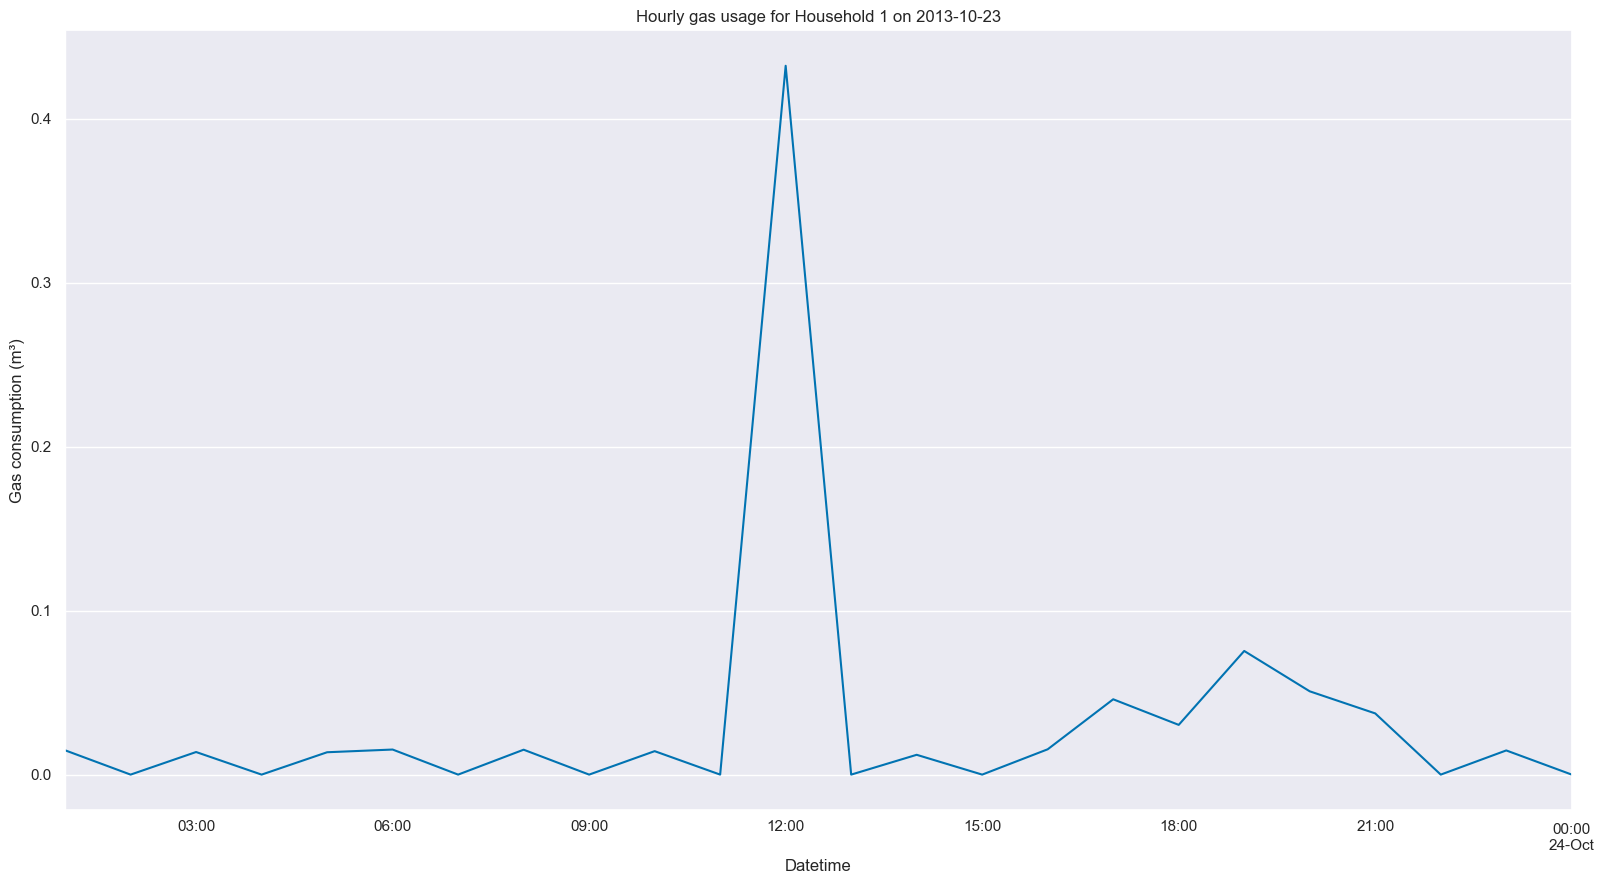

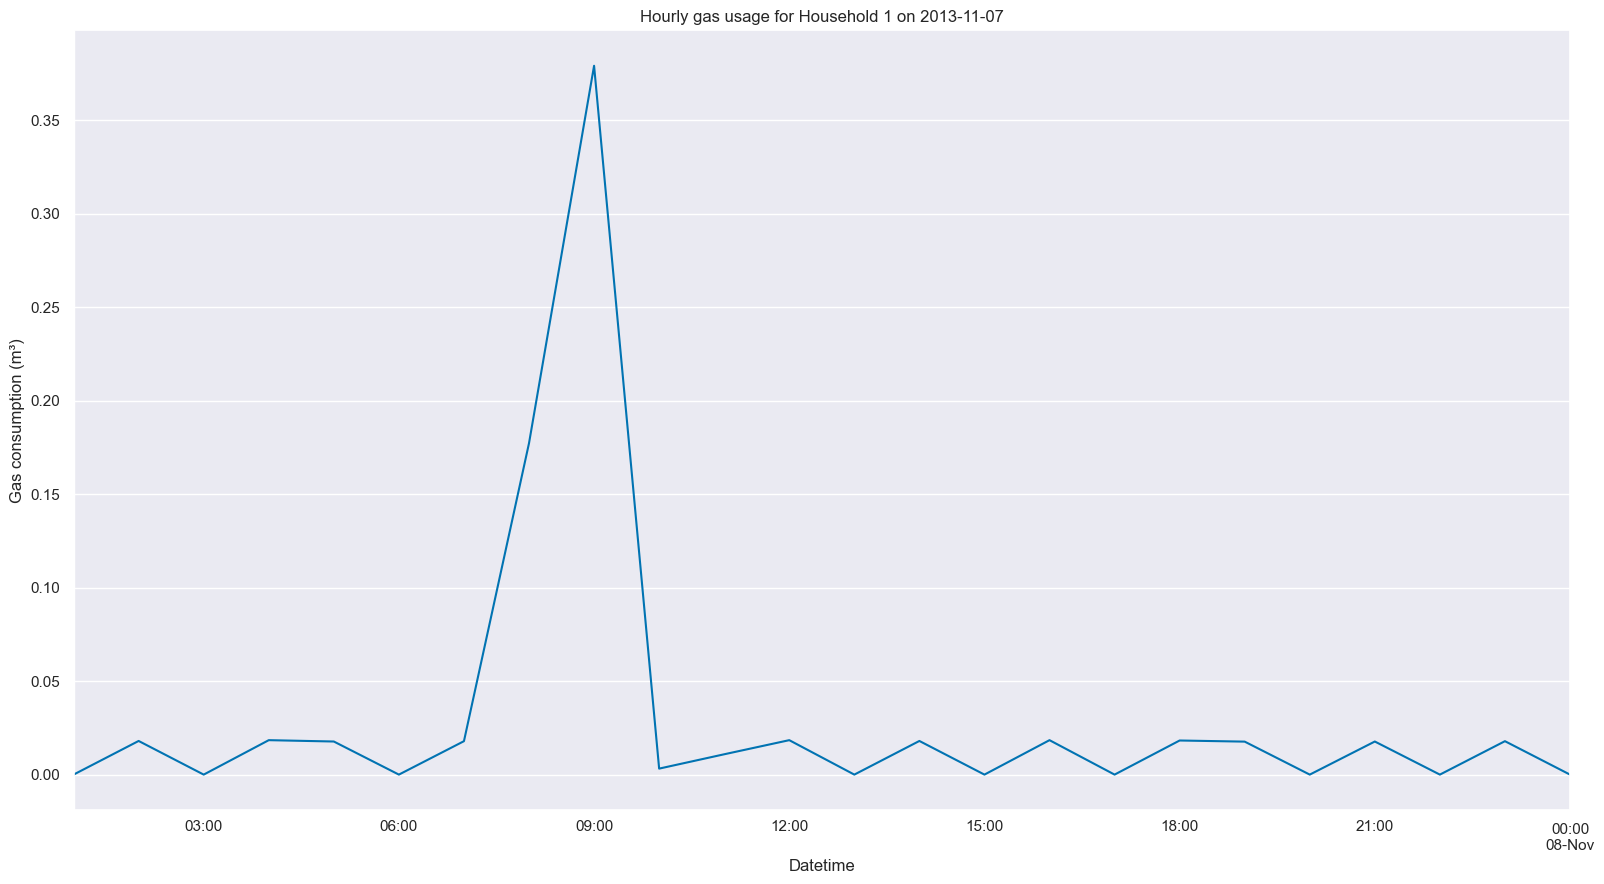

In [1923]:
for i in dates_gas_1:
    df_household_1[df_household_1['date'] == i]['gas'].plot()
    plt.title(f"Hourly gas usage for Household 1 on {i}")
    plt.tight_layout()
    plt.xlabel('Datetime')
    plt.ylabel('Gas consumption (m³)')
    plt.show()
    


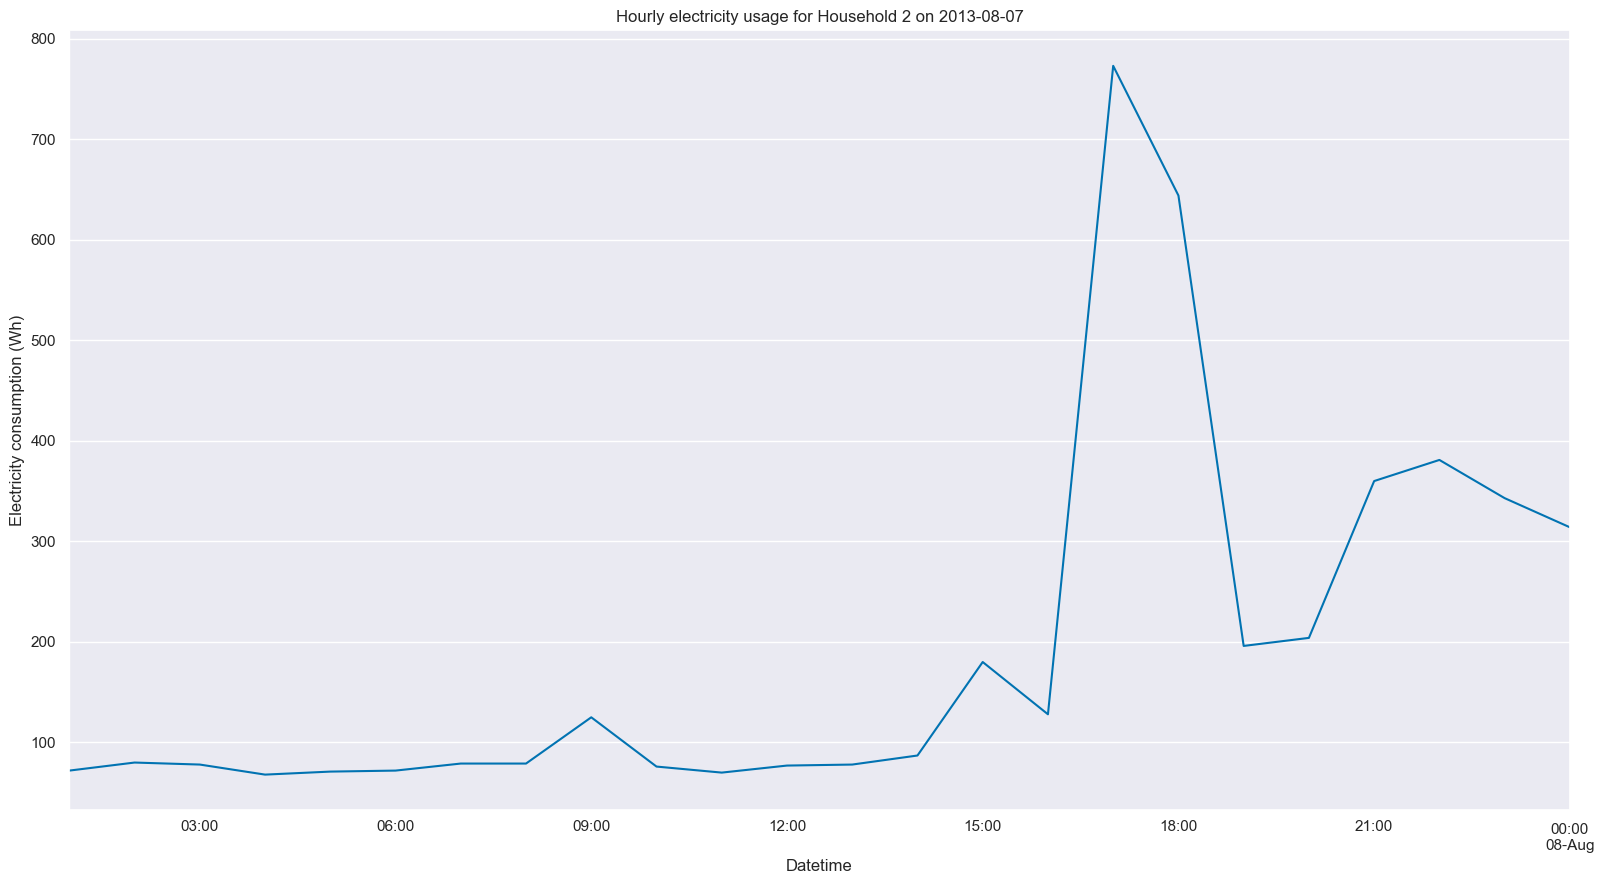

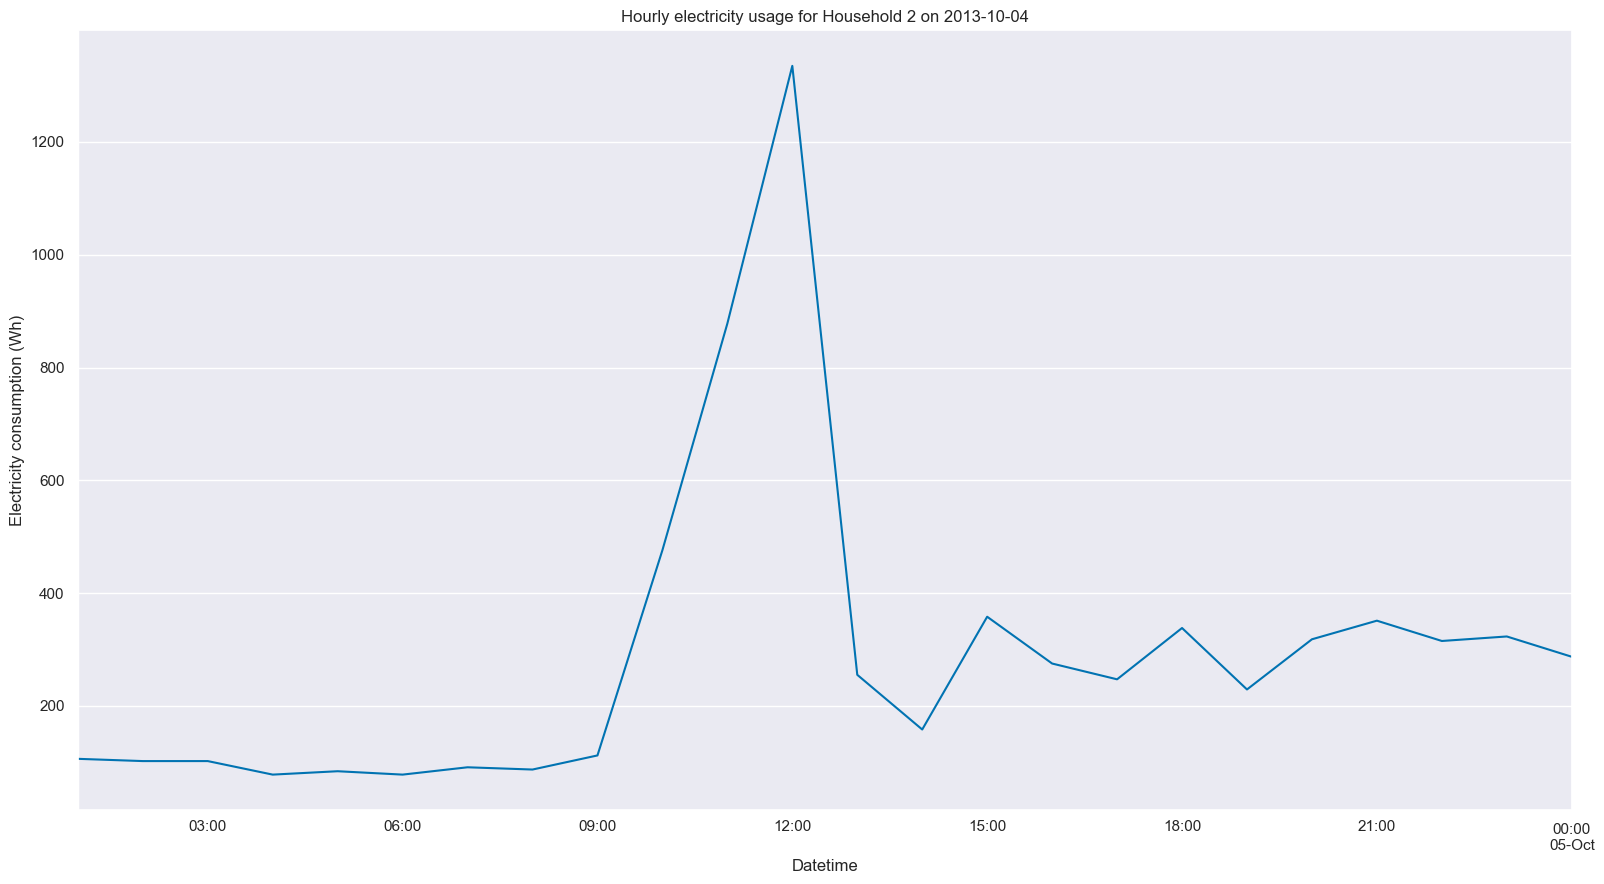

In [1924]:
for i in dates_electricity_2:
    df_household_2[df_household_2['date'] == i]['electricity'].plot()
    plt.title(f"Hourly electricity usage for Household 2 on {i}")
    plt.tight_layout()
    plt.xlabel('Datetime')
    plt.ylabel('Electricity consumption (Wh)')
    plt.show()


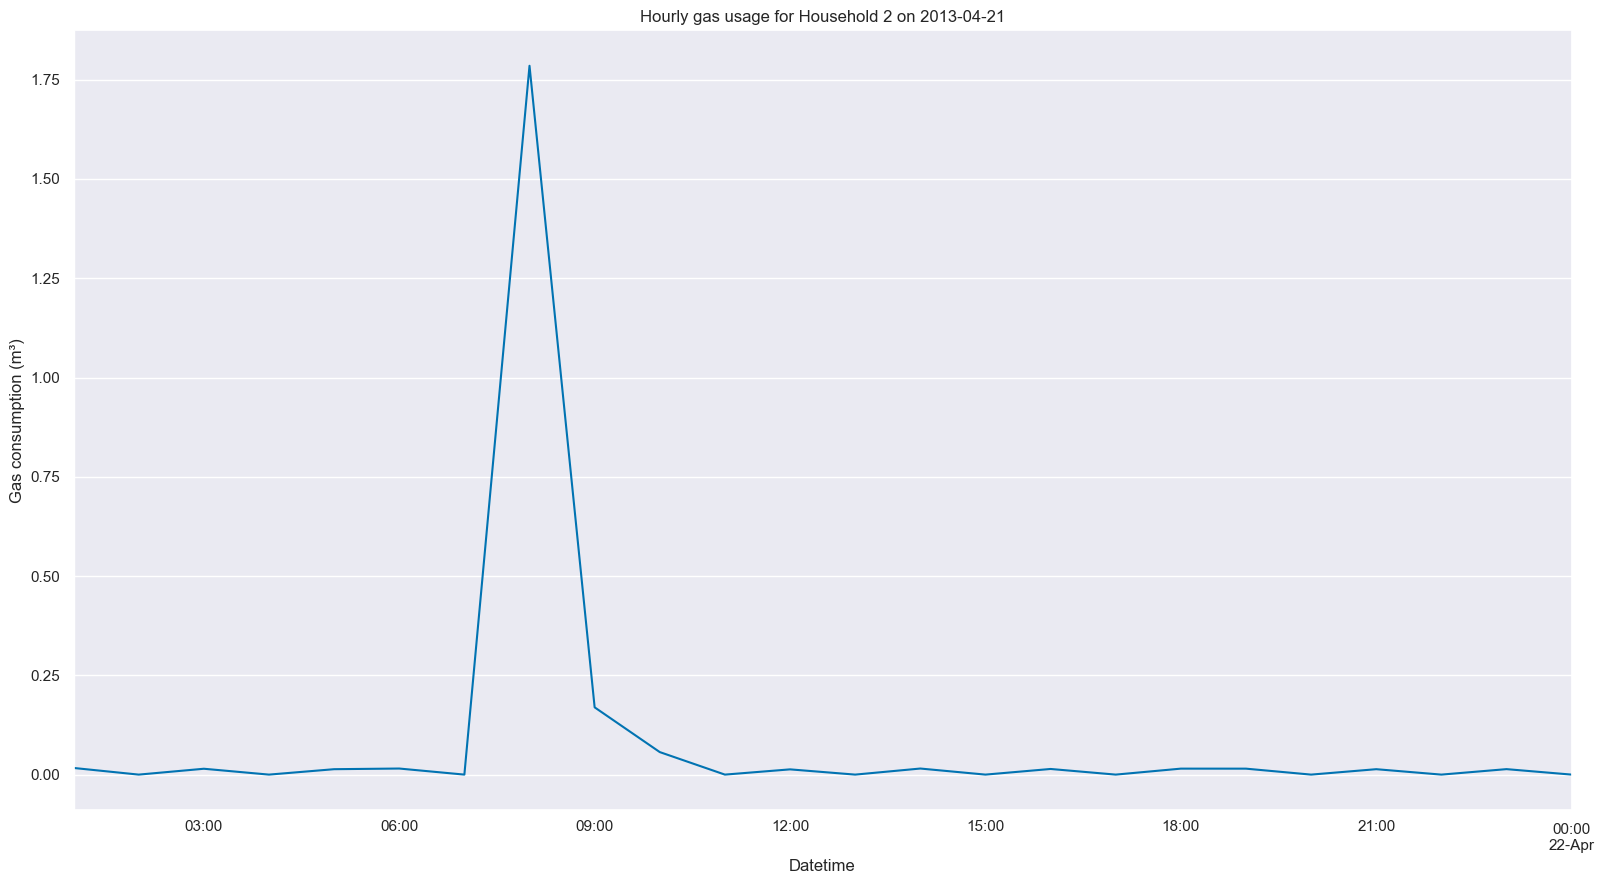

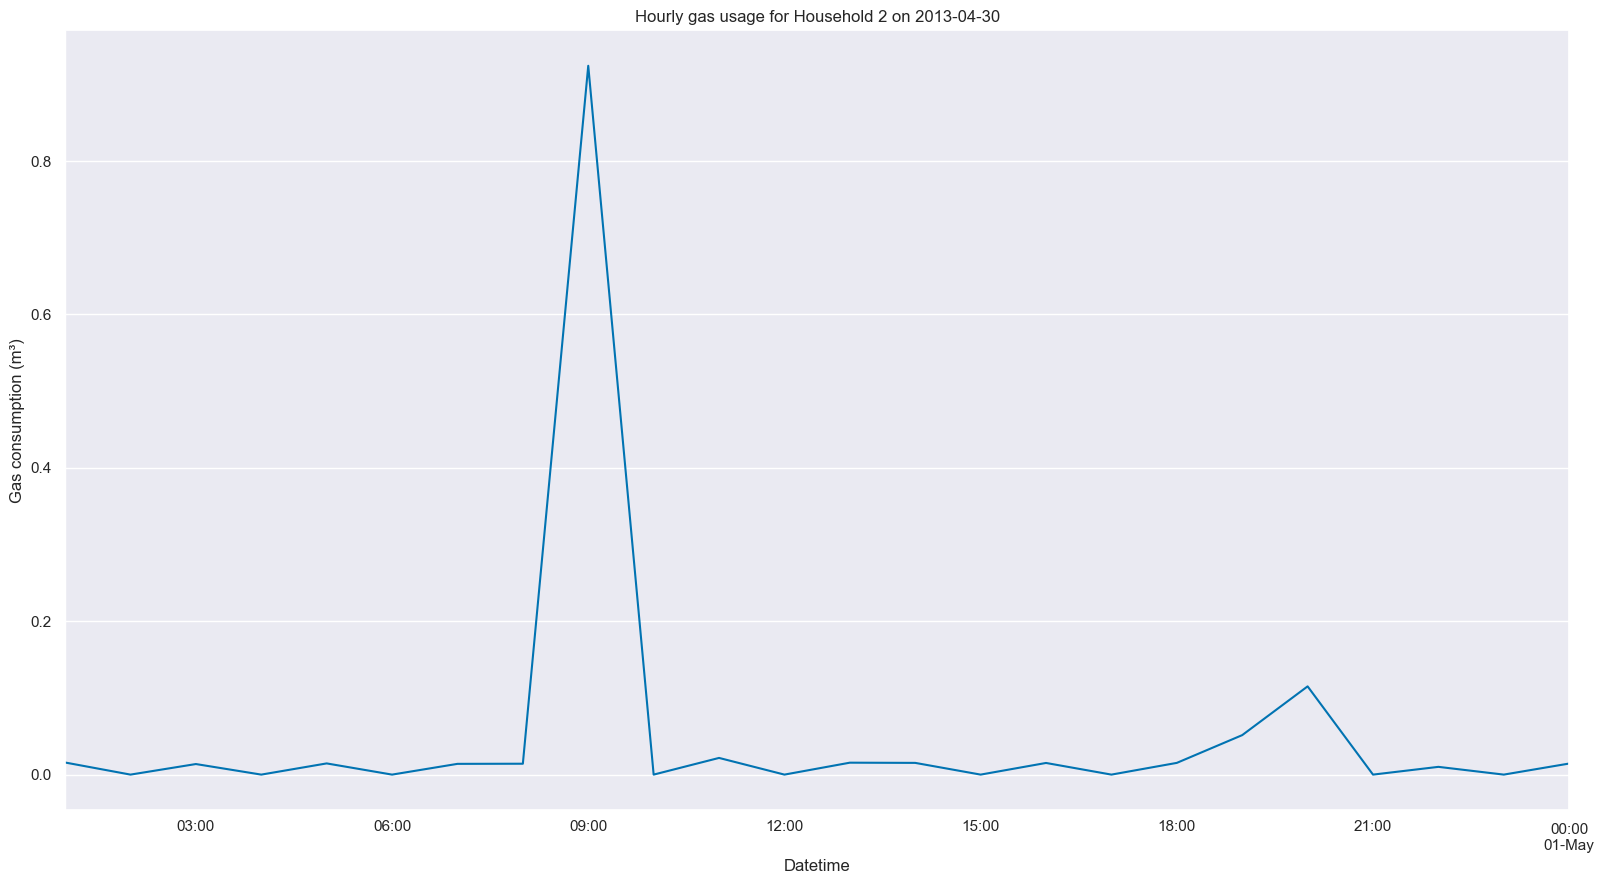

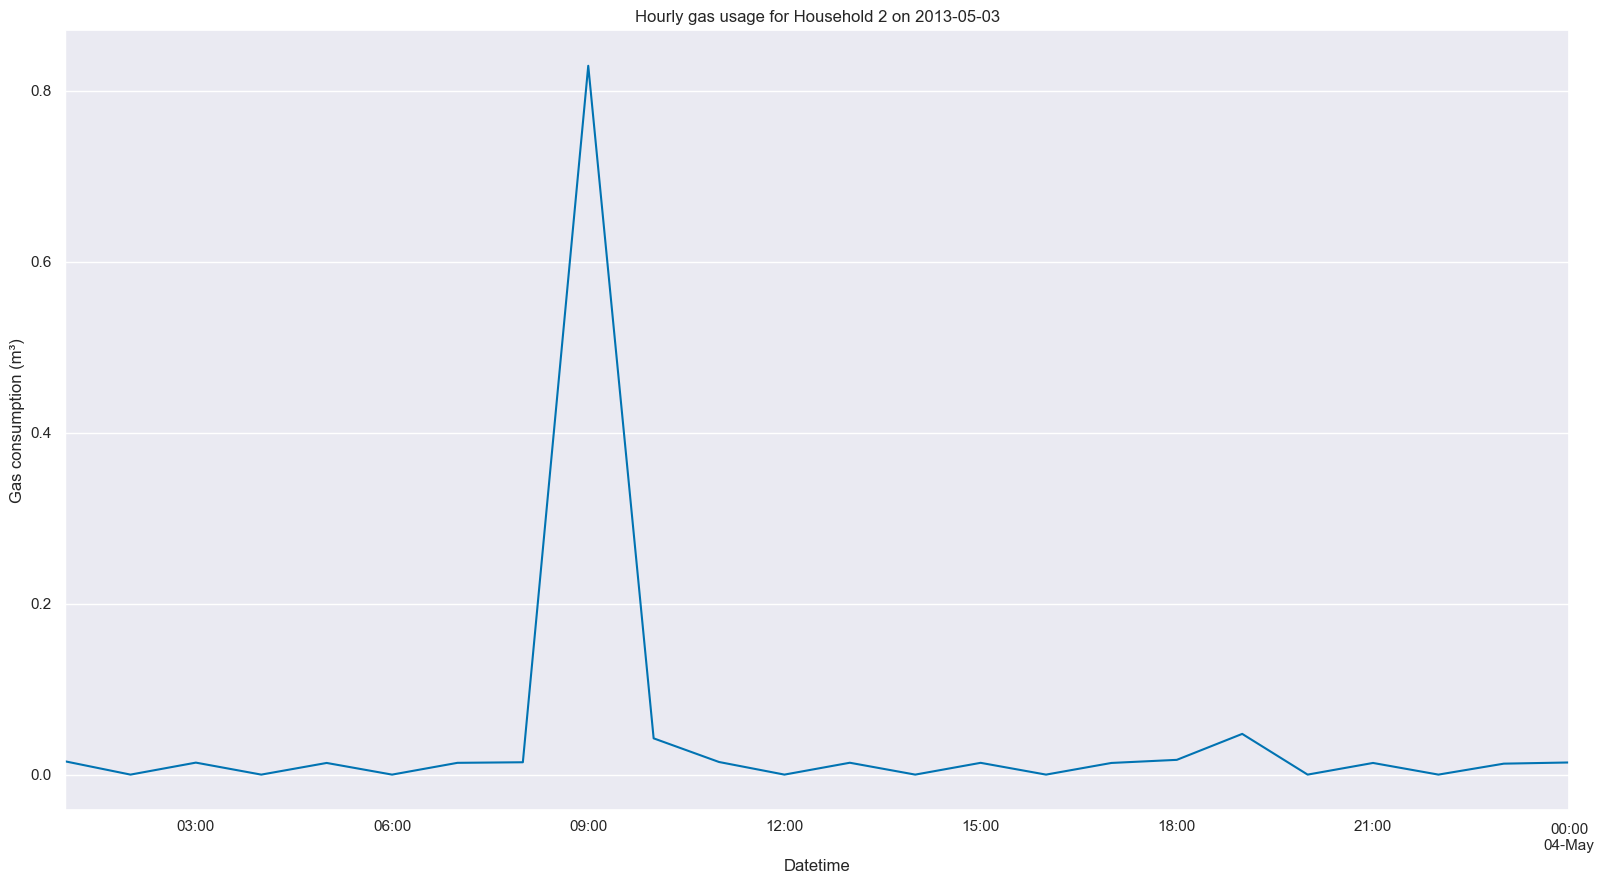

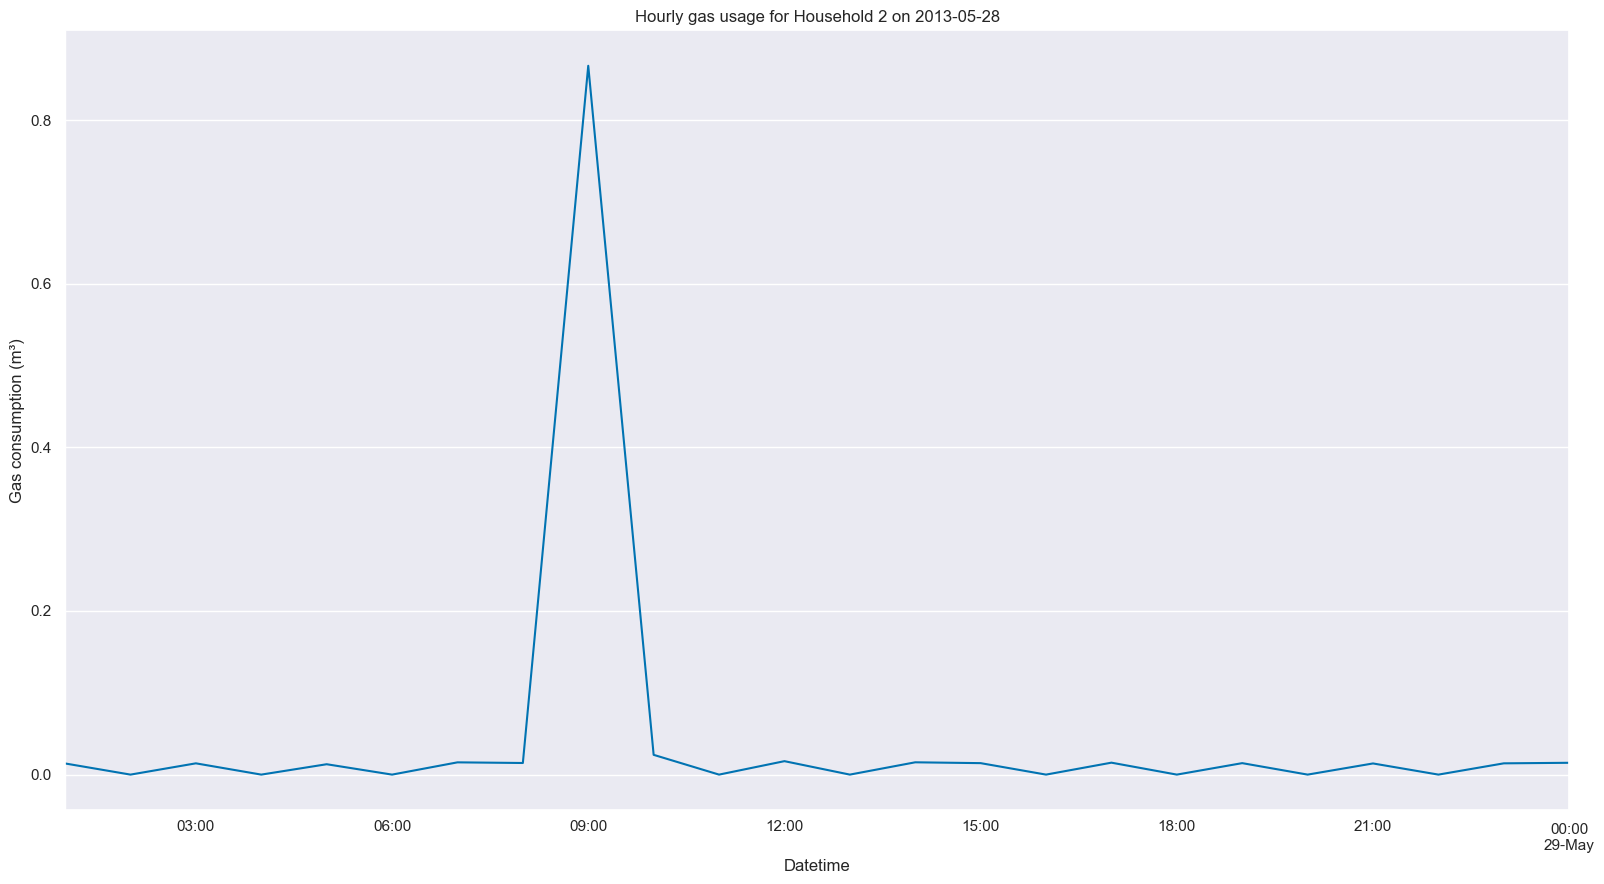

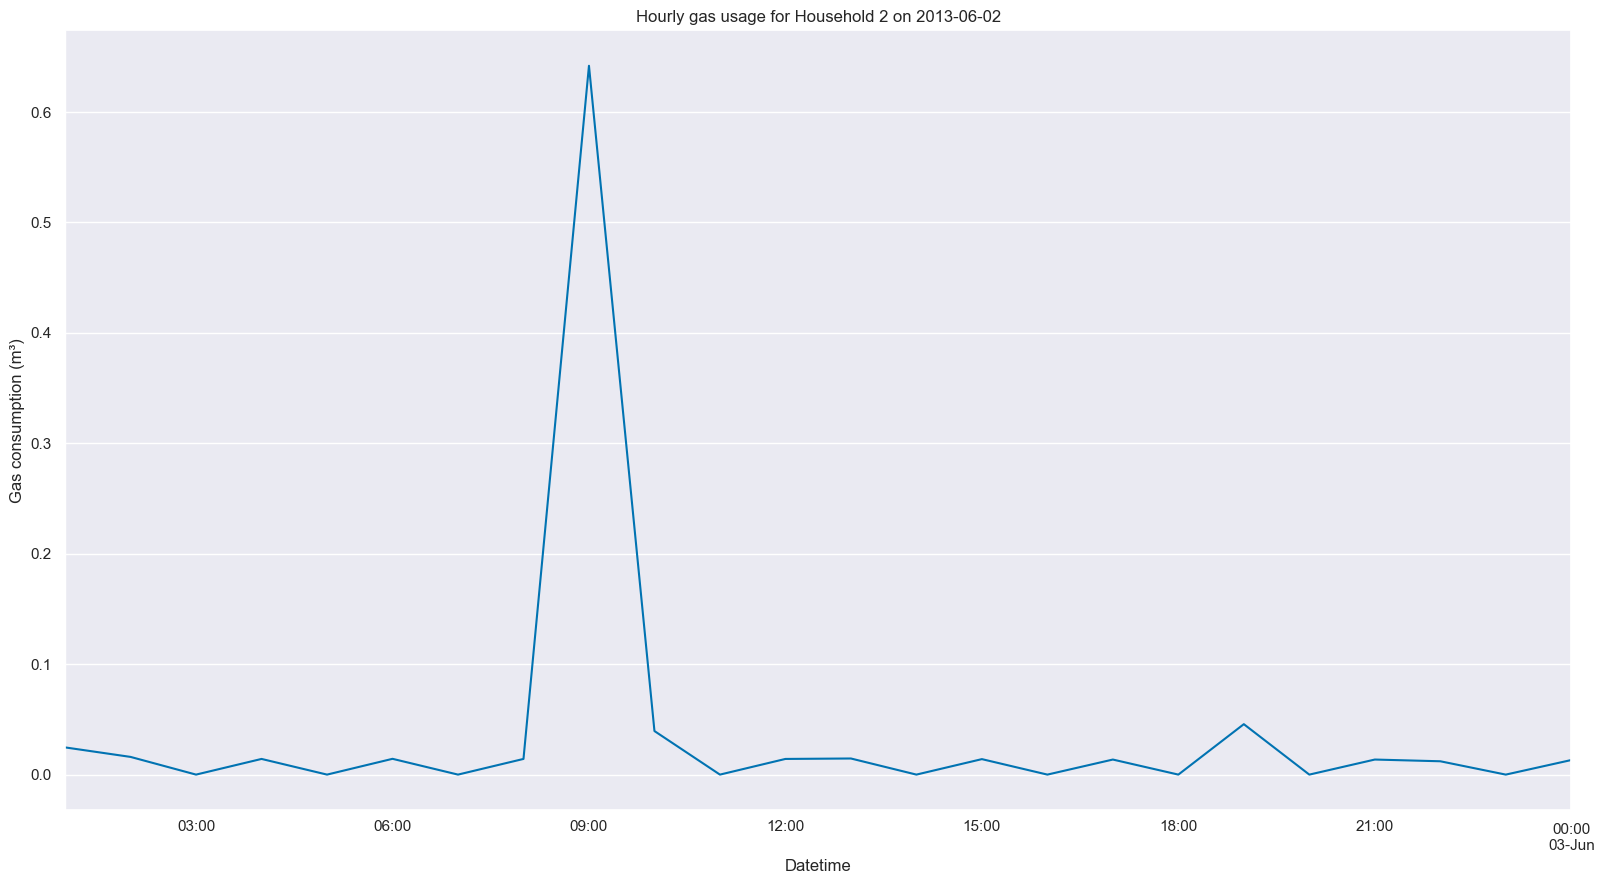

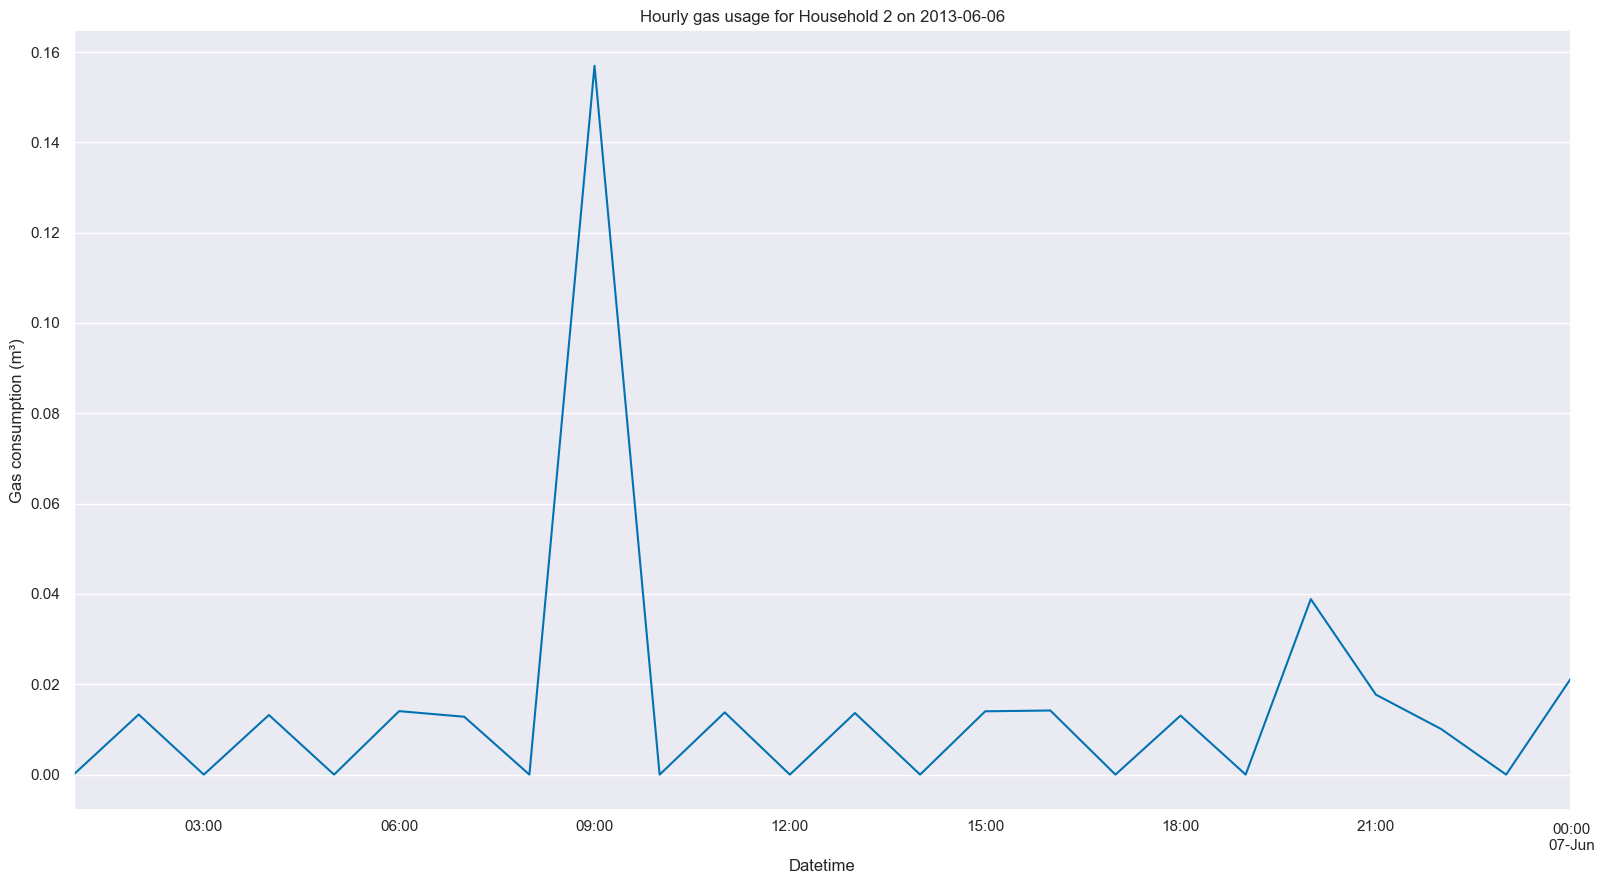

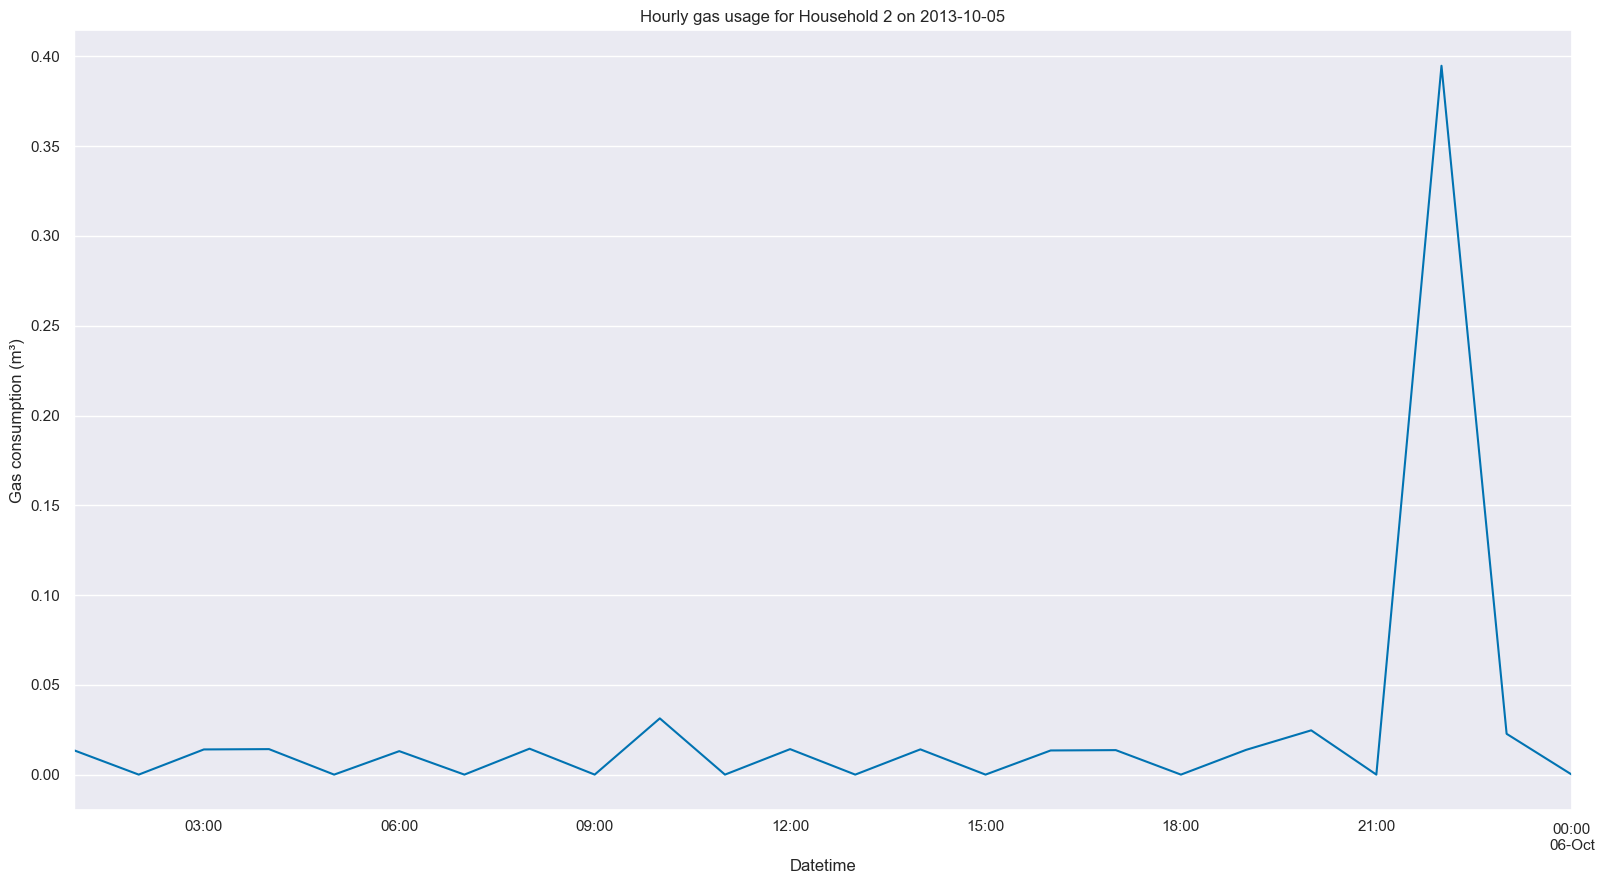

In [1925]:
for i in dates_gas_2:
    df_household_2[df_household_2['date'] == i]['gas'].plot()
    plt.title(f"Hourly gas usage for Household 2 on {i}")
    plt.tight_layout()
    plt.xlabel('Datetime')
    plt.ylabel('Gas consumption (m³)')
    plt.show()


In [798]:
s_atypical_1 = pd.Series(index=df_household_1['date'].unique()).fillna(False)
s_atypical_1.loc[atypical_dates_1] = True

C:\Users\20240996\AppData\Local\Temp\ipykernel_9156\49043656.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  s_atypical_1 = pd.Series(index=df_household_1['date'].unique()).fillna(False)


In [799]:
s_atypical_2 = pd.Series(index=df_household_2['date'].unique()).fillna(False)
s_atypical_2.loc[atypical_dates_2] = True

C:\Users\20240996\AppData\Local\Temp\ipykernel_9156\2138325710.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  s_atypical_2 = pd.Series(index=df_household_2['date'].unique()).fillna(False)


In [1926]:
atypical_reasons = """
The atypical days were identified by comparing the biggest increase or decrease of gas and electricity consumption. The days where collected firstly by looking at the unusual point in the peak daily, then they were zoomed and compared to the hourly data of those days. The dates marked as atypical for both households are based on observed anomalies in energy consumption patterns. These anomalies could be due to various reasons such as holidays, vacations, or unusual weather conditions. For both households, the dates include periods with significantly lower or higher energy consumption compared to surrounding days. For both gas and electricity consumption, the spikes were pretty clear to observe. However, for the electricity , it was a bit difficult to decide whether the spike was atypical. Some spikes might be due to holidays.
""" 


In [1927]:
df_typical_1 = df_daily_peak_household_1[s_atypical_1].copy()
df_typical_2 = df_daily_peak_household_2[s_atypical_2].copy()

In [1928]:
# sns.barplot(data=df_typical_1, x='date', y='electricity', label='Electricity consumption')
# sns.barplot(data=df_typical_1, x='date', y='gas', label='Gas consumption')

# plt.suptitle('Atypical days in Household 1', weight='bold', size=18)
# plt.ylabel('Energy consumption')
# plt.xlabel('Date')
# plt.tight_layout();


In [1929]:
#// END_TODO [Atypical-series]

# Hypothesis test

You have investigated when and where values are missing, made and interpreted some initial plots of the data, written a problem statement and hypothesis based on the data, and identified atypical periods in the data. Now it is time to test your hypothesis.

1. Execute the proper steps for a hypothesis test: check whether the hypothesis test is appropriate for this data, apply the test, and report the outcome. Make sure to go through all the necessary steps in your solution: clearly write down your null hypothesis and alternative hypothesis, the level of significance, etc.

   There may (or may not) be seasonal effects to the consumption of gas and/or electricity. To reduce the influence of such effects on the hypothesis test, you may want to restrict the data to a shorter time span, for instance just to winter months, or use the weather data to make this distinction.

   Of course, you should also apply what you learned about missing values and atypical periods in this data set.

   Perform the same test for **each household separately**. Are the results the same, or different? Reflect on this in your poster. You may want to check if you have any information in `df_customer`.

In [1930]:
#// BEGIN_TODO [Hypothesis-test] (1 point)

HOUSEHOLD 1

In [1931]:
H_0 = "mu_below_median=mu_above_median"
H_a = "mu_below_median>mu_above_median"

In [1932]:
query_household_1 = '''
    SELECT gas.datetime, gas.date, gas.'Customer 39' AS gas, electricity.'Customer 39' AS electricity, weather.temperature
    FROM customer, gas, electricity, weather
    WHERE gas.datetime = electricity.datetime AND gas.datetime = weather.datetime AND customer.customer = 'Customer 39'
'''
df_household_1 = pd.read_sql_query(query_household_1, conn_data, index_col='datetime', parse_dates=['datetime', 'date'])
df_household_1 = df_household_1[~df_household_1['date'].isin(dates_electricity_1)]
df_household_1 = df_household_1.copy().dropna(subset=['electricity', 'temperature'])

C:\Users\20240996\AppData\Local\Temp\ipykernel_9156\238033316.py:7: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_household_1 = df_household_1[~df_household_1['date'].isin(dates_electricity_1)]


Threshold for cold and warm days

In [1933]:
daily_data_1 = df_household_1.resample('D').agg({'temperature': 'mean'})
threshold = [daily_data_1['temperature'].quantile(0.5)]

In [1934]:
daily_data_1['temperature'].quantile(0.5)

10.158333333333333

In [1935]:
daily_data_1['temperature_category'] = pd.cut(daily_data_1['temperature'], bins=[-float('inf'), threshold[0], float('inf')], labels=['below_median', 'above_median'])

In [1936]:
daily_data_1[daily_data_1['temperature_category']=='below_median'].count()

temperature             183
temperature_category    183
dtype: int64

In [1937]:
df_household_1['temperature_category'] = daily_data_1['temperature_category']

In [1938]:
df_household_1['date'] = pd.to_datetime(df_household_1.index.date)

data_1 = df_household_1.merge(daily_data_1['temperature_category'], left_on='date', right_index=True, how='left')
data_1.rename(columns={'temperature_category_y': 'temperature_category'}, inplace=True)
data_1.drop(columns='temperature_category_x', inplace=True)

In [1939]:
# if 0 <= x.hour < 6 else 'other')

In [1940]:
# data_1['time_period'] = data_1.index.to_series().apply(lambda x: 'peak' if 17 <= x.hour < 22 else ('off_peak' if 0 <= x.hour < 17 else 'other'))

# data_1 = data_1[data_1['time_period'].isin(['peak', 'off_peak'])]

In [1941]:
data_1['time_period'] = data_1.index.to_series().apply(lambda x: 'peak' if 17 <= x.hour <= 22 else ('off_peak' if 0 <= x.hour < 17 or x.hour == 23 else 'other'))
data_1 = data_1[data_1['time_period'].isin(['peak', 'off_peak'])]

In [1942]:
# Temperature
data_household_1 = data_1.copy()
cold_data_household_1 = data_household_1[data_household_1['temperature_category'] == 'below_median']
warm_data_household_1 = data_household_1[data_household_1['temperature_category'] == 'above_median']

In [1943]:
data_household_1

,date,gas,electricity,temperature,temperature_category,time_period
datetime,,,,,,
2013-01-01 01:00:00,2013-01-01,0.000000,649.0,8.6,below_median,off_peak
2013-01-01 02:00:00,2013-01-01,0.014178,948.0,8.5,below_median,off_peak
2013-01-01 03:00:00,2013-01-01,0.000000,113.0,8.6,below_median,off_peak
2013-01-01 04:00:00,2013-01-01,0.014319,100.0,8.6,below_median,off_peak
2013-01-01 05:00:00,2013-01-01,0.012681,120.0,8.6,below_median,off_peak
...,...,...,...,...,...,...
2013-12-31 19:00:00,2013-12-31,0.069126,867.0,8.0,below_median,peak
2013-12-31 20:00:00,2013-12-31,0.000000,449.0,6.6,below_median,peak
2013-12-31 21:00:00,2013-12-31,0.011963,280.0,6.1,below_median,peak


In [1944]:
# Peaks
cold_peak_data_1 = cold_data_household_1[cold_data_household_1['time_period'] == 'peak']
cold_off_peak_data_1 = cold_data_household_1[cold_data_household_1['time_period'] == 'off_peak']
warm_peak_data_1 = warm_data_household_1[warm_data_household_1['time_period'] == 'peak']
warm_off_peak_data_1 = warm_data_household_1[warm_data_household_1['time_period'] == 'off_peak']

In [1945]:
cold_peak_data_1

,date,gas,electricity,temperature,temperature_category,time_period
datetime,,,,,,
2013-01-01 17:00:00,2013-01-01,0.556633,223.0,5.4,below_median,peak
2013-01-01 18:00:00,2013-01-01,0.389846,216.0,5.5,below_median,peak
2013-01-01 19:00:00,2013-01-01,0.382126,373.0,5.4,below_median,peak
2013-01-01 20:00:00,2013-01-01,0.529424,373.0,5.8,below_median,peak
2013-01-01 21:00:00,2013-01-01,0.254810,456.0,5.8,below_median,peak
...,...,...,...,...,...,...
2013-12-31 18:00:00,2013-12-31,0.343489,2061.0,8.2,below_median,peak
2013-12-31 19:00:00,2013-12-31,0.069126,867.0,8.0,below_median,peak
2013-12-31 20:00:00,2013-12-31,0.000000,449.0,6.6,below_median,peak


In [1946]:
cold_daily_peak_1 = cold_peak_data_1[cold_peak_data_1['time_period'] == 'peak'].groupby('date')['electricity'].mean().reset_index().rename(columns={'electricity': 'peak_avg'})
cold_daily_off_peak_1 = cold_off_peak_data_1[cold_off_peak_data_1['time_period'] == 'off_peak'].groupby('date')['electricity'].mean().reset_index().rename(columns={'electricity': 'off_peak_avg'})
warm_daily_peak_1 = warm_peak_data_1[warm_peak_data_1['time_period'] == 'peak'].groupby('date')['electricity'].mean().reset_index().rename(columns={'electricity': 'peak_avg'})
warm_daily_off_peak_1 = warm_off_peak_data_1[warm_off_peak_data_1['time_period'] == 'off_peak'].groupby('date')['electricity'].mean().reset_index().rename(columns={'electricity': 'off_peak_avg'})

In [1947]:
cold_daily_avg_1 = cold_daily_peak_1.merge(cold_daily_off_peak_1, on='date')
warm_daily_avg_1 = warm_daily_peak_1.merge(warm_daily_off_peak_1, on='date')

In [1948]:
cold_daily_avg_1["difference"] = cold_daily_avg_1["peak_avg"] - cold_daily_avg_1["off_peak_avg"]
warm_daily_avg_1["difference"] = warm_daily_avg_1["peak_avg"] - warm_daily_avg_1["off_peak_avg"]

In [1949]:
d_cold_1 = sm.stats.DescrStatsW(cold_daily_avg_1['difference'])
d_warm_1 = sm.stats.DescrStatsW(warm_daily_avg_1['difference'])
cm_1 = sm.stats.CompareMeans(d_cold_1, d_warm_1)

In [1950]:
cm_1.ttest_ind(alternative='larger')

(5.736514765577312, 1.0213203394251648e-08, 362.0)

HOUSEHOLD 2

In [1951]:
H_0 = "mu_below_median=mu_above_median"
H_a = "mu_below_median>mu_above_median"

In [1952]:
query_household_2 = '''
    SELECT gas.datetime, gas.date, gas.'Customer 57' AS gas, electricity.'Customer 57' AS electricity, weather.temperature
    FROM customer, gas, electricity, weather
    WHERE gas.datetime = electricity.datetime AND gas.datetime = weather.datetime AND customer.customer = 'Customer 57'
'''
df_household_2 = pd.read_sql_query(query_household_2, conn_data, index_col='datetime', parse_dates=['datetime', 'date'])
df_household_2 = df_household_2[~df_household_2['date'].isin(dates_electricity_2)]
df_household_2 = df_household_2.copy().dropna(subset=['electricity', 'temperature'])

C:\Users\20240996\AppData\Local\Temp\ipykernel_9156\1959833904.py:7: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_household_2 = df_household_2[~df_household_2['date'].isin(dates_electricity_2)]


In [1953]:
daily_data_2 = df_household_2.resample('D').agg({'temperature': 'mean'})
threshold = [daily_data_2['temperature'].quantile(0.5)]

In [1954]:
daily_data_2['temperature_category'] = pd.cut(daily_data_2['temperature'], bins=[-float('inf'), threshold[0], float('inf')], labels=['below_median', 'above_median'])

In [1955]:
daily_data_2[daily_data_2['temperature_category']=='above_median'].count()

temperature             182
temperature_category    182
dtype: int64

In [1956]:
df_household_2['temperature_category'] = daily_data_2['temperature_category']

In [1957]:
df_household_2['date'] = pd.to_datetime(df_household_2.index.date)

data_2 = df_household_2.merge(daily_data_2['temperature_category'], left_on='date', right_index=True, how='left')
data_2.rename(columns={'temperature_category_y': 'temperature_category'}, inplace=True)
data_2.drop(columns='temperature_category_x', inplace=True)

In [1958]:
# data_2['time_period'] = data_2.index.to_series().apply(lambda x: 'peak' if 17 <= x.hour < 22 else ('off_peak' if 0 <= x.hour < 17 else 'other'))

# data_2 = data_2[data_2['time_period'].isin(['peak', 'off_peak'])]

In [1959]:
data_2['time_period'] = data_2.index.to_series().apply(
    lambda x: 'peak' if 17 <= x.hour <= 22 else ('off_peak' if 0 <= x.hour < 17 or x.hour == 23 else 'other')
)
data_2 = data_2[data_2['time_period'].isin(['peak', 'off_peak'])]

In [1960]:
# Temperature
data_household_2 = data_2.copy()
cold_data_household_2 = data_household_2[data_household_2['temperature_category'] == 'below_median']
warm_data_household_2 = data_household_2[data_household_2['temperature_category'] == 'above_median']

In [1961]:
# Peaks
cold_peak_data_2 = cold_data_household_2[cold_data_household_2['time_period'] == 'peak']
cold_off_peak_data_2 = cold_data_household_2[cold_data_household_2['time_period'] == 'off_peak']
warm_peak_data_2 = warm_data_household_2[warm_data_household_2['time_period'] == 'peak']
warm_off_peak_data_2 = warm_data_household_2[warm_data_household_2['time_period'] == 'off_peak']

In [1962]:
cold_daily_peak_2 = cold_peak_data_2[cold_peak_data_2['time_period'] == 'peak'].groupby('date')['electricity'].mean().reset_index().rename(columns={'electricity': 'peak_avg'})
cold_daily_off_peak_2 = cold_off_peak_data_2[cold_off_peak_data_2['time_period'] == 'off_peak'].groupby('date')['electricity'].mean().reset_index().rename(columns={'electricity': 'off_peak_avg'})
warm_daily_peak_2 = warm_peak_data_2[warm_peak_data_2['time_period'] == 'peak'].groupby('date')['electricity'].mean().reset_index().rename(columns={'electricity': 'peak_avg'})
warm_daily_off_peak_2 = warm_off_peak_data_2[warm_off_peak_data_2['time_period'] == 'off_peak'].groupby('date')['electricity'].mean().reset_index().rename(columns={'electricity': 'off_peak_avg'})

In [1963]:
cold_daily_avg_2 = cold_daily_peak_2.merge(cold_daily_off_peak_2, on='date')
warm_daily_avg_2 = warm_daily_peak_2.merge(warm_daily_off_peak_2, on='date')

In [1964]:
cold_daily_avg_2["difference"] = cold_daily_avg_2["peak_avg"] - cold_daily_avg_2["off_peak_avg"]
warm_daily_avg_2["difference"] = warm_daily_avg_2["peak_avg"] - warm_daily_avg_2["off_peak_avg"]

In [1965]:
d_cold_2 = sm.stats.DescrStatsW(cold_daily_avg_2['difference'])
d_warm_2 = sm.stats.DescrStatsW(warm_daily_avg_2['difference'])
cm_2 = sm.stats.CompareMeans(d_cold_2, d_warm_2)

In [1966]:
cm_2.ttest_ind(alternative='larger')

(10.18783971620702, 6.810639503066007e-22, 361.0)

In [1967]:
# cold_peak_data_1 = peak_data_1[peak_data_1['temperature_category'] == 'cold']
# cold_off_peak_data_1 = off_peak_data1[off_peak_data1['temperature_category'] == 'cold']
# hot_peak_data_1 = peak_data_1[peak_data_1['temperature_category'] == 'hot']
# hot_off_peak_data_1 = off_peak_data1[off_peak_data1['temperature_category'] == 'hot']

In [1968]:
cold_peak_data_1['electricity'].mean() - cold_off_peak_data_1['electricity'].mean()

299.52976396916347

In [1969]:
warm_peak_data_1['electricity'].mean() - warm_off_peak_data_1['electricity'].mean()

141.3474524248005

In [1970]:
# a = data_household_1.groupby(['date', 'time_period', 'temperature_category'])[['electricity']]

In [1971]:
data_household_1["difference_cold"] = cold_peak_data_1['electricity'] - cold_off_peak_data_1['electricity']

In [1972]:
# data_household_1

In [1973]:
# df_household_1 = df_household_1["2013-06-01":"2013-08-31"]

In [1974]:
# df_household_2['time_period'] = df_household_2.index.to_series().apply(
#     lambda x: 'peak' if 18 <= x.hour < 22 else ('off_peak' if 0 <= x.hour < 6 else 'other')
# )
# data2 = df_household_2[df_household_2['time_period'].isin(['peak', 'off_peak'])]

In [1975]:
# peak_data_cold_1 = data1[data1['time_period'] == 'peak']
# off_peak_data1 = data1[data1['time_period'] == 'off_peak']
# peak_data2 = data2[data2['time_period'] == 'peak']
# off_peak_data2 = data2[data2['time_period'] == 'off_peak']

In [1976]:
# d_peak1 = sm.stats.DescrStatsW(peak_data1['gas'])
# d_off_peak1 = sm.stats.DescrStatsW(off_peak_data1['gas'])
# d_peak2 = sm.stats.DescrStatsW(peak_data2['gas'])
# d_off_peak2 = sm.stats.DescrStatsW(off_peak_data2['gas'])

In [1977]:
# cm1 = sm.stats.CompareMeans(d_peak1, d_off_peak1)
# cm2 = sm.stats.CompareMeans(d_peak2, d_off_peak2)

In [1978]:
# cm1.ttest_ind(alternative='larger')


In [1979]:
# cm2.ttest_ind(alternative='larger')

In [1980]:
# cm1.tconfint_diff(alpha=0.05, alternative='two-sided')
# cm2.tconfint_diff(alpha=0.05, alternative='two-sided')

In [1981]:
# mean_consumption

In [1982]:
#// END_TODO [Hypothesis-test]

# Create your poster

Finally, create a poster on which you present and discuss your results. You **must use the template of the poster for GA2 available on Canvas**. There, you can also find more information on how to create your poster.

In case you want to perform any additional analysis, please, use the cells below.

<div class="alert alert-block alert-danger">
    <ol>
        <li>Include supporting evidence for choosing your hypothesis in your poster.</li>
        <li>Double-check if the visualizations are produced correctly on Momotor under the <b>Running submitted notebook</b> tab. Make sure that every visualization on your poster can also be seen under that tab.</li>
    </ol>
</div>

In [1983]:
#// BEGIN_TODO [Poster] (0 points)

<Axes: xlabel='date', ylabel='difference_filtered'>

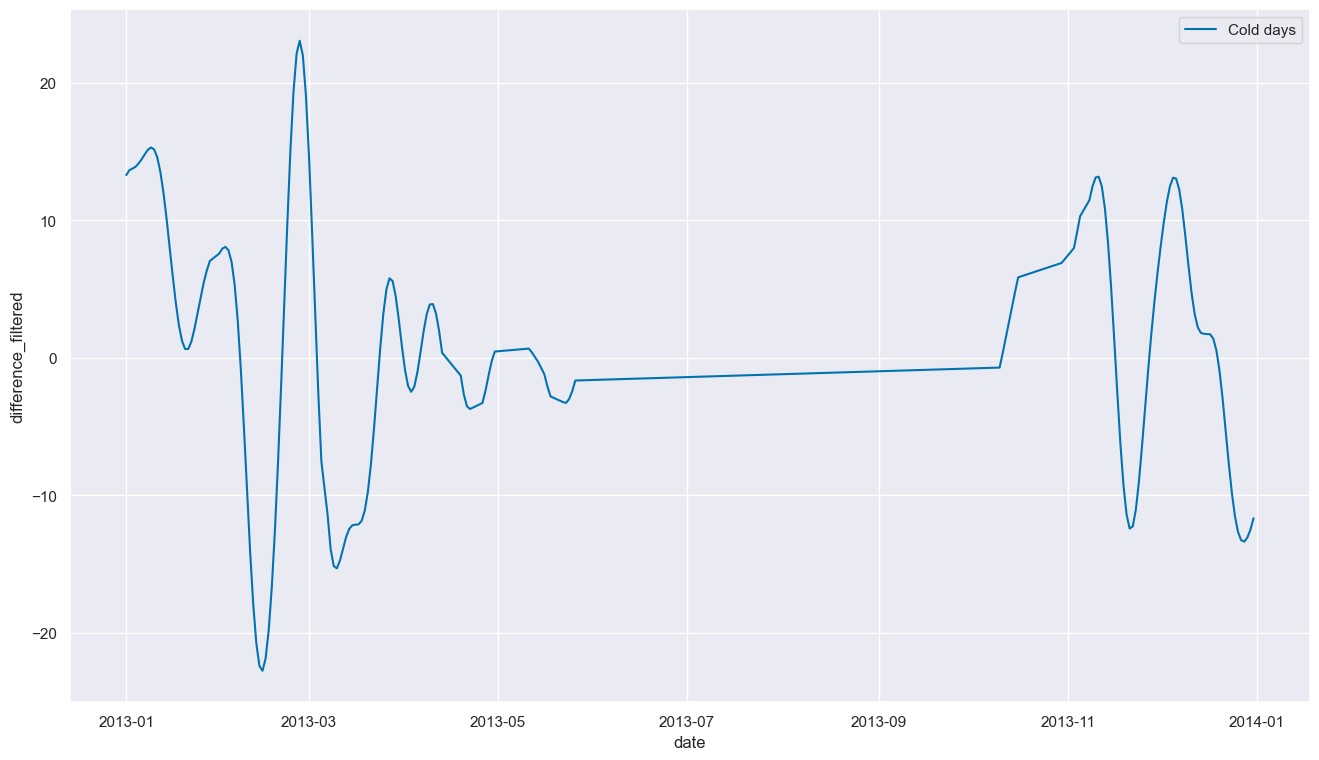

In [1984]:
cold_daily_avg_1['difference_filtered']= gaussian_filter1d(cold_daily_avg_1['difference'], sigma=5, mode='nearest', order=1)
sns.lineplot(data=cold_daily_avg_1, x='date', y='difference_filtered', label='Cold days')

<Axes: xlabel='date', ylabel='difference'>

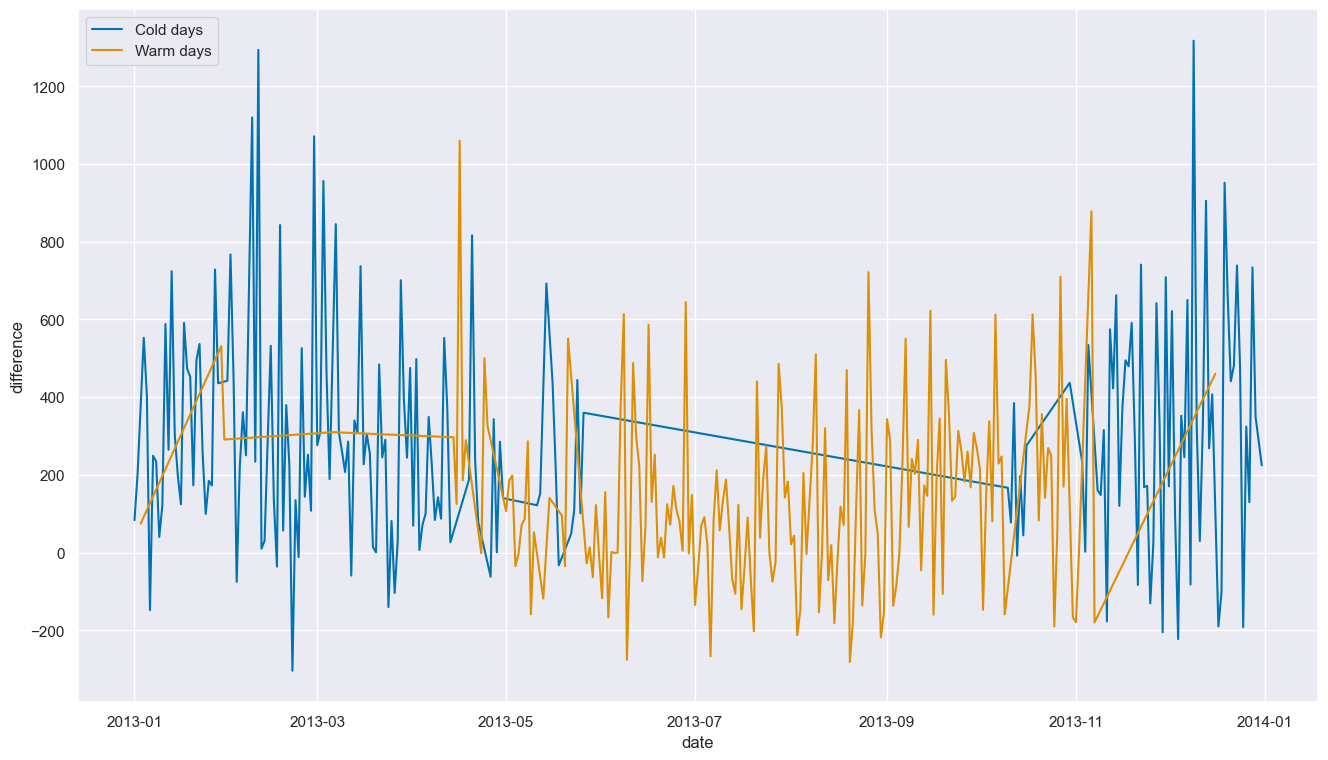

In [1985]:
sns.lineplot(data=cold_daily_avg_1, x='date', y='difference', label='Cold days')
sns.lineplot(data=warm_daily_avg_1, x='date', y='difference', label='Warm days')

In [1989]:
mean = pd.DataFrame({'cold_weather':[cold_daily_avg_1["difference"].mean(), cold_daily_avg_2["difference"].mean()], "warm_weather":[warm_daily_avg_1["difference"].mean(), warm_daily_avg_2["difference"].mean()]}, index=['household_1', 'household_2'])
mean

,cold_weather,warm_weather
household_1,299.581021,141.432835
household_2,194.741062,123.336837


In [1990]:
# sns.barplot(data=mean, x=mean.index, y=mean.values, hue=mean.columns)

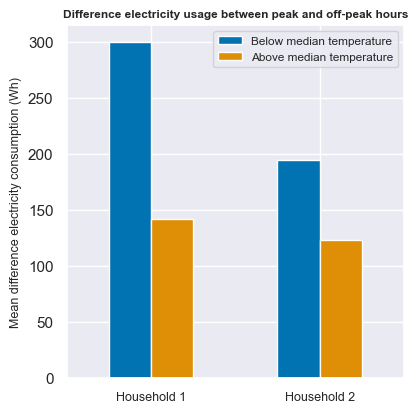

In [1991]:
fig, ax = plt.subplots(figsize=(4.3, 4.3))
mean.plot(kind='bar', ax=ax)
plt.ylabel('Mean difference electricity consumption (Wh)', size=9)
plt.title('Difference electricity usage between peak and off-peak hours', weight="bold", size=8.5)
plt.legend(['Below median temperature', 'Above median temperature'], prop={'size':8.5})
plt.xticks([0, 1], ['Household 1', 'Household 2'], rotation=0, size=9)
plt.tight_layout()



In [1992]:
daily__df_household_1 = data_household_1.groupby(['date','time_period']).agg({'temperature': 'mean','electricity': 'mean'}).reset_index()


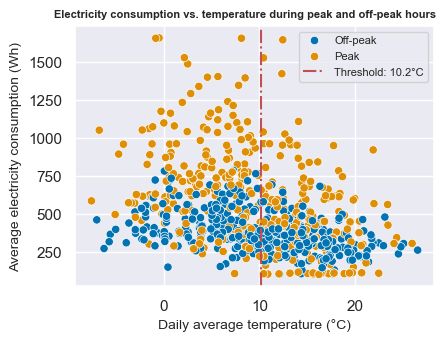

In [1993]:
fig, ax = plt.subplots(figsize=(4.6,3.7))

sns.scatterplot(data=daily__df_household_1, x='temperature', y='electricity',hue='time_period')
ax.set_xlabel("Daily average temperature (°C)", fontsize=10)
ax.set_ylabel("Average electricity consumption (Wh)", fontsize=10)
ax.axvline(x=10.158, color='r', linestyle='-.', label="Threshold: 10.2° C")
plt.legend(ax.get_legend_handles_labels()[0], ['Off-peak', 'Peak', 'Threshold: 10.2°C'], prop={'size':8})
plt.suptitle("Electricity consumption vs. temperature during peak and off-peak hours", weight='bold', size=8, y=0.92, x=0.55)

plt.tight_layout()
plt.show()



<Axes: >

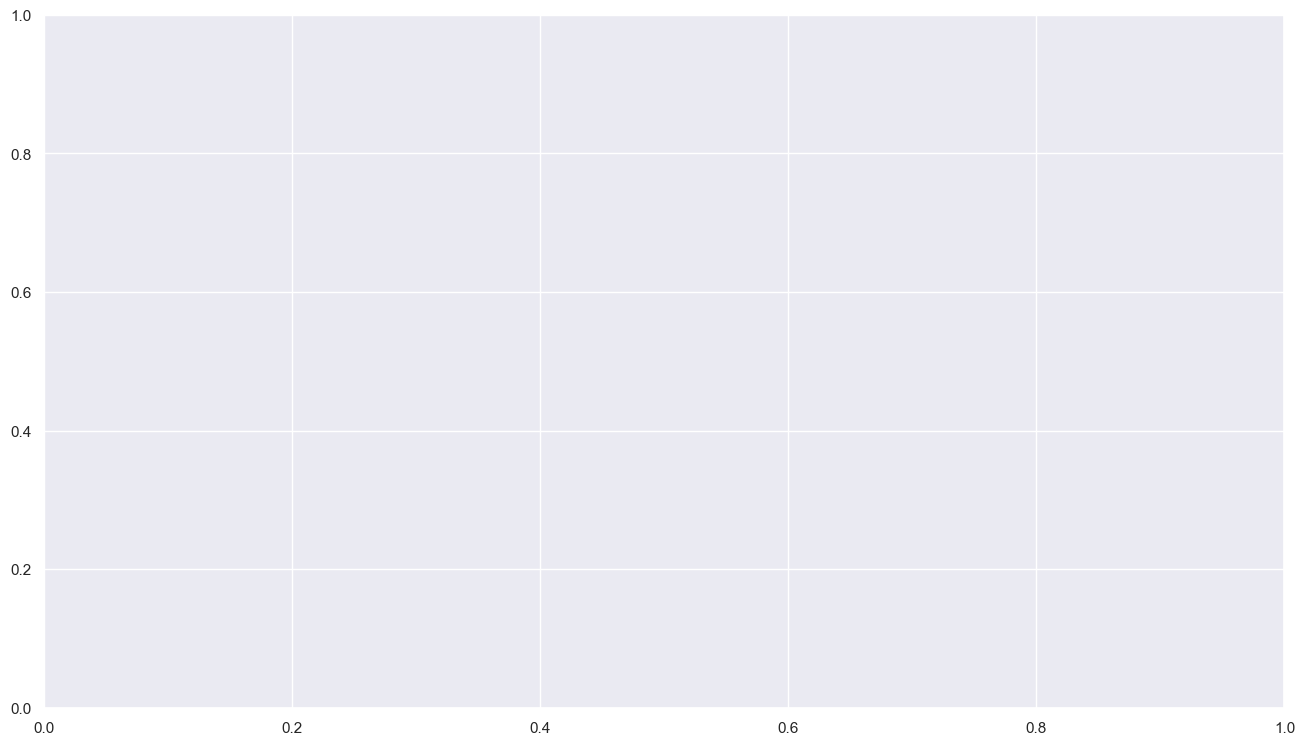

In [1994]:
sns.scatterplot()

In [1997]:
warm_daily_avg_1["difference"].mean()

141.432835012458

<Axes: xlabel='date', ylabel='difference'>

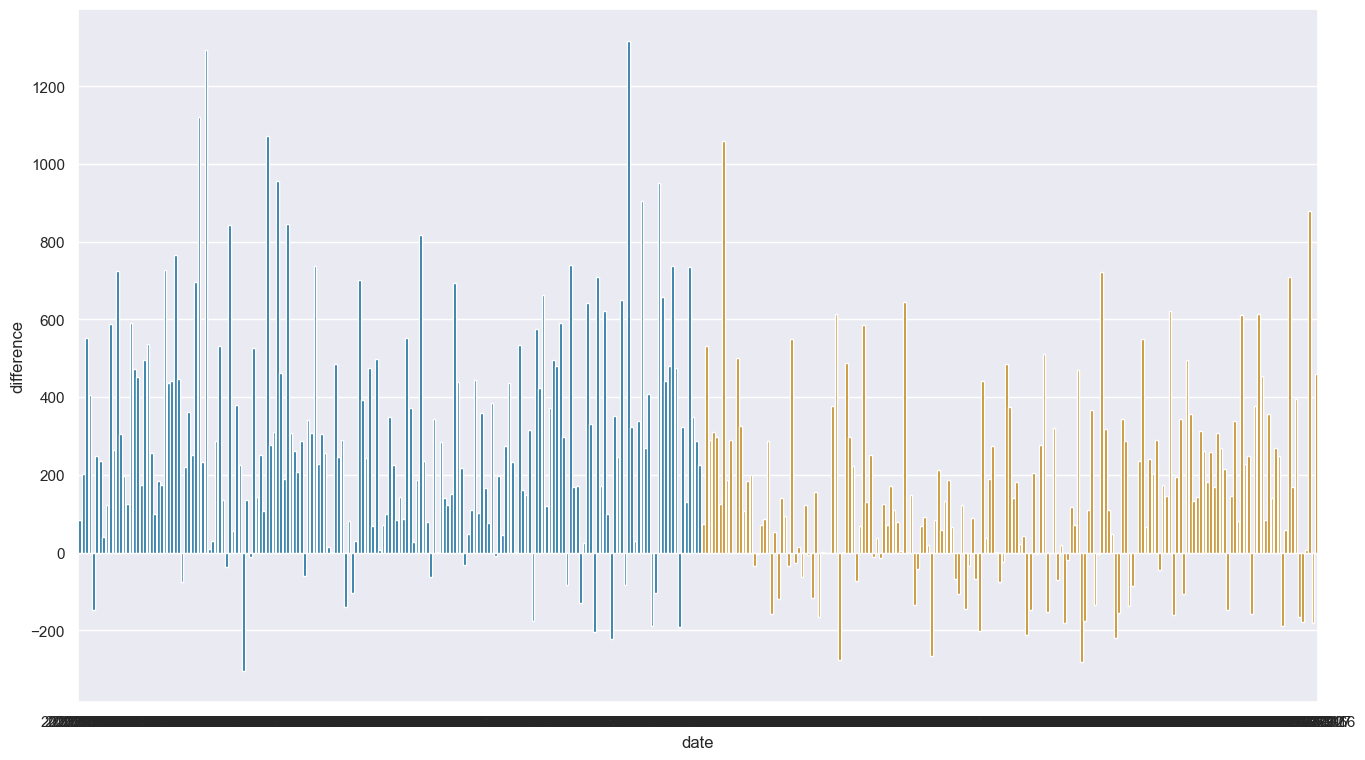

In [1998]:
sns.barplot(data=cold_daily_avg_1, x='date', y='difference')
sns.barplot(data=warm_daily_avg_1, x='date', y='difference')

In [1999]:
#// END_TODO [Poster]

# Feedback

Please fill in this questionaire to help us improve this course for the next year. Your feedback will be anonymized and will not affect your grade in any way!

### How many hours did you spend on these Exercises?

Assign a number to `feedback_time`.

In [2000]:
#// BEGIN_FEEDBACK [Feedback_1] (0 point)
feedback_time= 42
#// END_FEEDBACK [Feedback_1] (0 point)

import numbers
assert isinstance(feedback_time, numbers.Number), "Please assign a number to feedback_time"
feedback_time

42

### How difficult did you find these Exercises?

Assign an integer to `feedback_difficulty`, on a scale 0 - 10, with 0 being very easy, 5 being just right, and 10 being very difficult.

In [2001]:
#// BEGIN_FEEDBACK [Feedback_2] (0 point)
feedback_difficulty = 7
#// END_FEEDBACK [Feedback_2] (0 point)

import numbers
assert isinstance(feedback_difficulty, numbers.Number), "Please assign a number to feedback_difficulty"
feedback_difficulty

7

### (Optional) What did you like?

Assign a string to `feedback_like`.

In [ ]:
#// BEGIN_FEEDBACK [Feedback_3] (0 point)

#// END_FEEDBACK [Feedback_3] (0 point)

### (Optional) What can be improved?

Assign a string to `feedback_improve`. Please be specific, so that we can act on your feedback. For example, mention the specific exercises and what was unclear.

In [ ]:
#// BEGIN_FEEDBACK [Feedback_4] (0 point)

#// END_FEEDBACK [Feedback_4] (0 point)




## How to Submit Your Work

1. **Before submitting**, you must run your notebook by doing **Kernel > Restart & Run All**.  
   Make sure that your notebook runs without errors **in linear order**.
1. Remember to rename the notebook, replacing `...-template.ipynb` with `...-yourIDnr.ipynb`, where `yourIDnr` is your TU/e identification number.
1. Submit the executed notebook with your work
   for the appropriate assignment in **Canvas**.
1. In the **Momotor** tab in Canvas,
  you can select that assignment again to find some feedback on your submitted work.
  If there are any problems reported by _Momotor_,
  then you need to fix those,
  and **resubmit the fixed notebook**.

In case of a high workload on our server
(because many students submit close to the deadline),
it may take longer to receive the feedback.




---

In [ ]:
# List all defined names
%whos

---

# (End of Notebook) <span class="tocSkip"></span>

&copy; 2024-2025 - **TU/e** - Eindhoven University of Technology